In [1]:
# 1 Inicio
# 1.1 Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.2 Abrir los archivos CSV
df_cash = pd.read_csv('extract - cash request - data analyst.csv')
df_fees = pd.read_csv('extract - fees - data analyst - .csv')

# 1.3 Mostrar las primeras filas de los DataFrames
print("\n\033[1m\033[95mPARTE 1: Primeras filas\033[0m")
print("Cash head:")
display(df_cash.head())
print("Fees head:")
display(df_fees.head())


PARTE 1: Primeras filas
Cash head:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


Fees head:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [3]:
# 2. Información de los DataFrames
# 2.1 Mostrar información de los tipos de datos
print("\n\033[1m\033[95mPARTE 2: Descripción estadística\033[0m")
print("Info df_cash:")
print(df_cash.info())
print("----------------------------------------------------------")
print("Info df_fees:")
print(df_fees.info())
print("----------------------------------------------------------")
# 2.2 Mostrar descripción estadística
#print("Descripción estadística de Cash:")
#print(df_cash.describe())
#print("----------------------------------------------------------")
#print("Descripción estadística de Fees:")
#print(df_fees.describe())
#print("----------------------------------------------------------")


PARTE 2: Descripción estadística
Info df_cash:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-nu

In [4]:
# 3. Limpiar fechas para agrupar por meses
# 3.1 Definir las columnas de fechas para Cash y Fees
#print("\n\033[1m\033[95mPARTE 3: Agrupar por meses\033[0m")
date_columns_cash = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 
    'reco_last_update'
]
date_columns_fees = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']

# 3.2 Convertir y normalizar las fechas con pd.to_datetime
for col in date_columns_cash:
    df_cash[col] = pd.to_datetime(df_cash[col], errors='coerce').dt.normalize()
for col in date_columns_fees:
    df_fees[col] = pd.to_datetime(df_fees[col], errors='coerce').dt.normalize()

In [5]:
# 4. Tipos de datos las columnas de fecha de ambos df:
print("\n\033[1m\033[95mPARTE 4: Tipos de datos las columnas de fecha de ambos df:\033[0m")
print("\nTipos de datos de Cash Requests:")
print(df_cash[date_columns_cash].dtypes)
print("\nTipos de datos de Fees:")
print(df_fees[date_columns_fees].dtypes)


PARTE 4: Tipos de datos las columnas de fecha de ambos df:

Tipos de datos de Cash Requests:
created_at                    datetime64[ns, UTC]
updated_at                    datetime64[ns, UTC]
moderated_at                  datetime64[ns, UTC]
reimbursement_date            datetime64[ns, UTC]
cash_request_received_date         datetime64[ns]
money_back_date               datetime64[ns, UTC]
send_at                       datetime64[ns, UTC]
reco_creation                 datetime64[ns, UTC]
reco_last_update              datetime64[ns, UTC]
dtype: object

Tipos de datos de Fees:
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
paid_at       datetime64[ns, UTC]
from_date     datetime64[ns, UTC]
to_date       datetime64[ns, UTC]
dtype: object


In [6]:
# 5.1 Ordenar por 'created_at' en ambos DataFrames
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)
df_fees_sorted = df_fees.sort_values(by='created_at', ascending=True)

# 5.2 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 5: Resultados después de ordenar por fecha de creación:\033[0m")
print("Cash sorted by created_at:")
display(df_cash_sorted.head())
print("Fees sorted by created_at:")
display(df_fees_sorted.head())


PARTE 5: Resultados después de ordenar por fecha de creación:
Cash sorted by created_at:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7920,3,1.0,canceled,2019-11-19 00:00:00+00:00,2020-12-14 00:00:00+00:00,47.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
7260,4,100.0,money_back,2019-12-09 00:00:00+00:00,2020-11-04 00:00:00+00:00,NaN,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
0,5,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,804.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
4118,13,100.0,direct_debit_rejected,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,406.0,2019-12-11 00:00:00+00:00,NaN,NaT,2019-12-12,NaT,regular,NaT,pending,2020-03-20 00:00:00+00:00,2020-03-31 00:00:00+00:00
7785,28,100.0,money_back,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,140.0,2019-12-11 00:00:00+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT


Fees sorted by created_at:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1211,46,1858.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1858,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-09 00:00:00+00:00,before
1252,67,2292.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2292,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-07 00:00:00+00:00,2020-06-22 00:00:00+00:00,before
1214,56,2117.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,NaT,NaT,before
20555,60,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-06-19 00:00:00+00:00,2020-07-04 00:00:00+00:00,before
1231,57,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-07-04 00:00:00+00:00,2020-07-19 00:00:00+00:00,before


In [7]:
# 6 Creacion de cohortes
print("\n\033[1m\033[95mPARTE 6: Creación de cohortes\033[0m")
# 6.1 Llenar valores nulos de 'user_id' con 'deleted_account_id'
df_cash['user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id'])

# 6.2 Eliminar filas con user_id aún nulos
df_cash = df_cash[~df_cash['user_id'].isna()]

# 6.3 Agrupar por user_id y obtener la primera fecha de created_at
cohorts = df_cash.groupby('user_id')['created_at'].min().reset_index()
cohorts.rename(columns={'created_at': 'first_created_at'}, inplace=True)

# 6.4 Crear una nueva columna con el formato de mes y año
cohorts['cohort'] = cohorts['first_created_at'].dt.tz_localize(None).dt.to_period('M').astype(str)

# 6.5 Unir los cohorts al DataFrame original
df_cash = df_cash.merge(cohorts[['user_id', 'cohort']], on='user_id', how='left')

# 6.6 Mostrar los primeros resultados para verificar
display(df_cash[['user_id', 'created_at', 'cohort']].head())


PARTE 6: Creación de cohortes


,user_id,created_at,cohort
0,804.0,2019-12-10 00:00:00+00:00,2019-12
1,231.0,2019-12-10 00:00:00+00:00,2019-12
2,191.0,2019-12-10 00:00:00+00:00,2019-12
3,761.0,2019-12-10 00:00:00+00:00,2019-12
4,7686.0,2020-05-06 00:00:00+00:00,2020-05


In [8]:
# 7. Ordenar el DataFrame df_cash por la columna created_at
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)

# 7.1 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 7: Ordenar\033[0m")
print("DataFrame cash ordenado por created_at:")
display(df_cash_sorted[['user_id', 'created_at', 'cohort', 'deleted_account_id']])


PARTE 7: Ordenar
DataFrame cash ordenado por created_at:


,user_id,created_at,cohort,deleted_account_id
7920,47.0,2019-11-19 00:00:00+00:00,2019-11,NaN
7260,1309.0,2019-12-09 00:00:00+00:00,2019-12,1309.0
0,804.0,2019-12-10 00:00:00+00:00,2019-12,NaN
4118,406.0,2019-12-10 00:00:00+00:00,2019-12,NaN
7785,140.0,2019-12-10 00:00:00+00:00,2019-12,NaN
...,...,...,...,...
17945,160.0,2020-11-01 00:00:00+00:00,2020-05,NaN
17944,26094.0,2020-11-01 00:00:00+00:00,2020-08,NaN
21083,34866.0,2020-11-01 00:00:00+00:00,2020-09,NaN
18028,23216.0,2020-11-01 00:00:00+00:00,2020-07,NaN



PARTE 8: Distribución de usuarios por cohorte


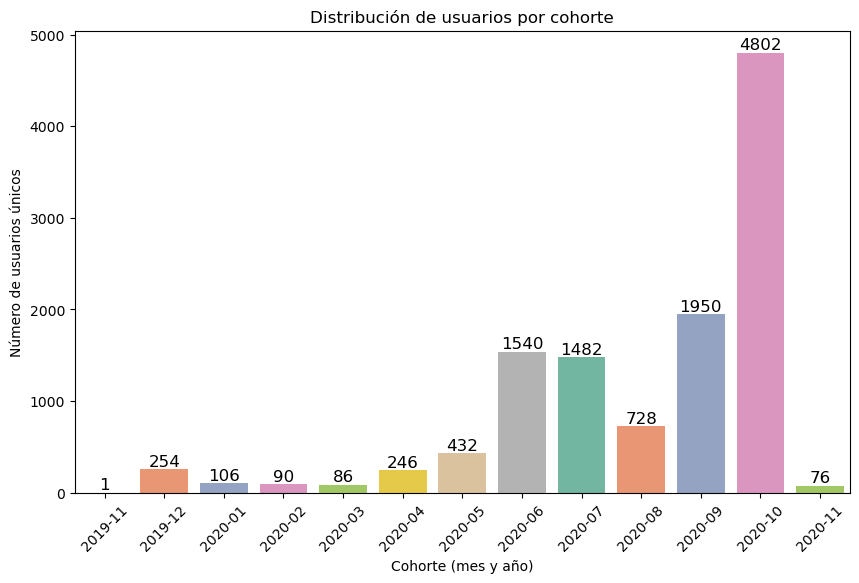

In [9]:
# 8. Gráfico - Distribución de usuarios por cohorts
print("\n\033[1m\033[95mPARTE 8: Distribución de usuarios por cohorte\033[0m")

# Contar usuarios únicos por cohort
cohort_counts = df_cash.groupby('cohort')['user_id'].nunique()

# 8.1 Visualización de la distribución de usuarios por cohort
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cohort_counts.index.astype(str), y=cohort_counts.values, hue=cohort_counts.index.astype(str), palette='Set2', legend=False)
plt.title('Distribución de usuarios por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Número de usuarios únicos')
plt.xticks(rotation=45)

# 8.2 Añadir la cantidad total arriba de cada columna
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


PARTE 9: Distribución de estados de las solicitudes de dinero

Distribución de los estados de las solicitudes de dinero
status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


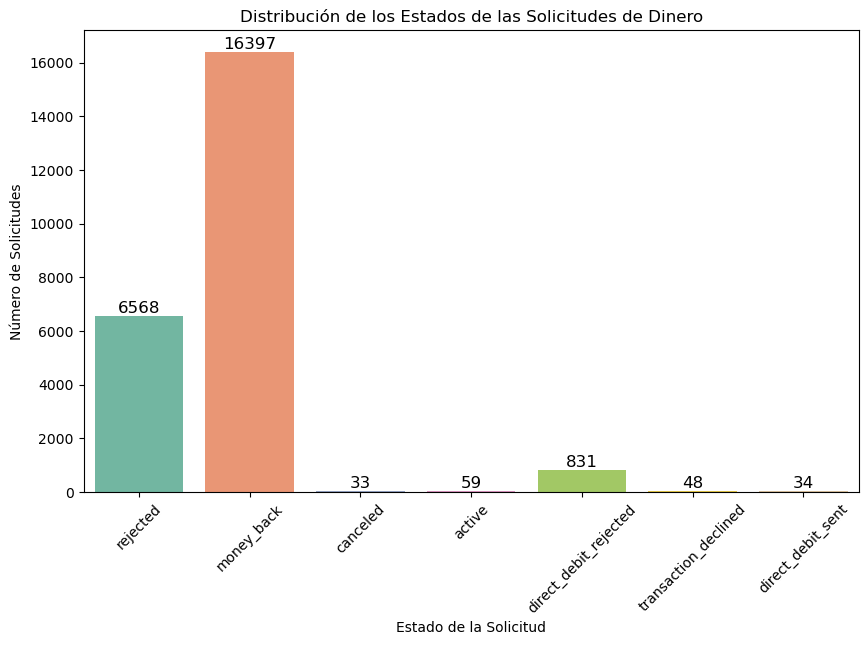

In [10]:
# 9.1 Distribución de los estados actuales
print("\n\033[1m\033[95mPARTE 9: Distribución de estados de las solicitudes de dinero\033[0m")
status_distribution = df_cash['status'].value_counts()
print("\nDistribución de los estados de las solicitudes de dinero")
print(status_distribution)

# 9.2 Visualización de la distribución de los estados
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='status', data=df_cash, palette='Set2', hue='status', legend=False)  # Asignar hue
plt.title('Distribución de los Estados de las Solicitudes de Dinero')
plt.xlabel('Estado de la Solicitud')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)

# 9.3 Añadir la cantidad total arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()


PARTE 10: Frecuencia media por cohorte


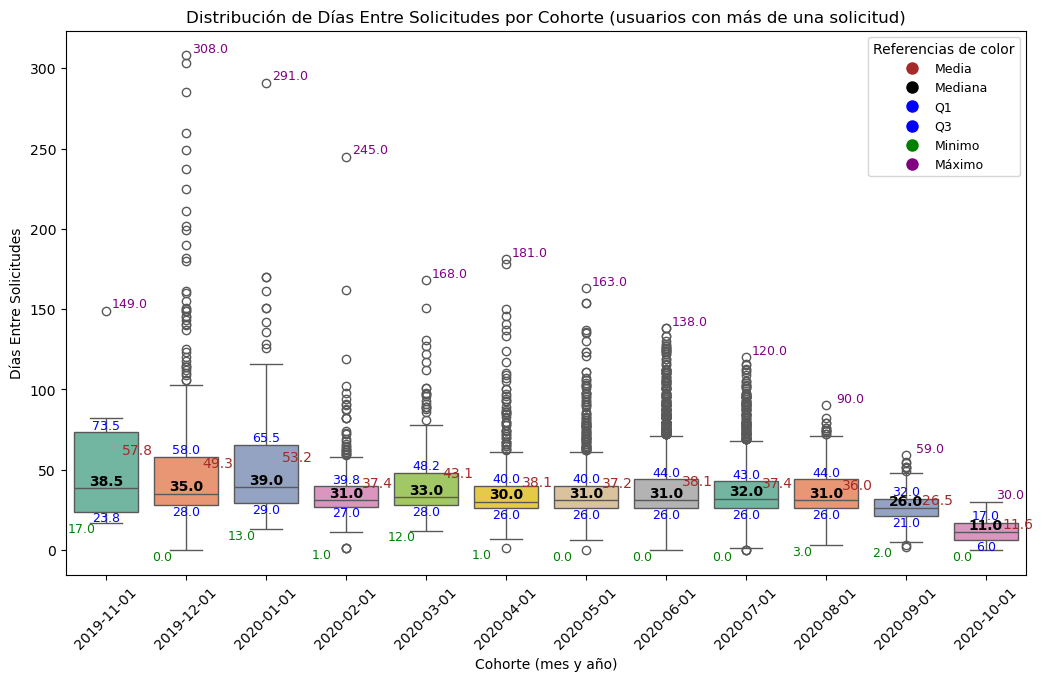

-----------------------------------------------------------------------------------------------------------------------------------------------


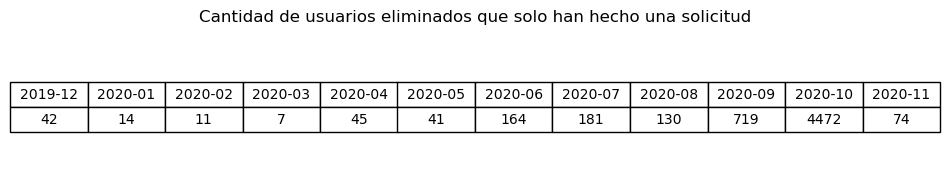

In [12]:
# 10 Frecuencia media por cohorte
print("\n\033[1m\033[95mPARTE 10: Frecuencia media por cohorte\033[0m")
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
df_cash['cohort'] = pd.to_datetime(df_cash['cohort'], format='%Y-%m')

# 10.1 Filtrar usuarios que han hecho más de una solicitud, excluyendo 'rejected'
user_counts = df_cash['user_id'].value_counts()
multiple_requests_users = user_counts[user_counts > 1].index
df_cash_filtered = df_cash[(df_cash['status'] != 'rejected') & (df_cash['user_id'].isin(user_counts[user_counts > 1].index))]

# 10.2 Calcular la frecuencia por usuario como la diferencia entre solicitudes
df_cash_filtered = df_cash_filtered.sort_values(by=['user_id', 'created_at'])
df_cash_filtered['days_between'] = df_cash_filtered.groupby('user_id')['created_at'].diff().dt.days.dropna()

# 10.3 Calcular el número de usuarios que solo han hecho una solicitud por cohorte
single_request_users = user_counts[user_counts == 1].index
df_cash_single_request = df_cash[df_cash['user_id'].isin(single_request_users) & (df_cash['status'] != 'rejected')]
single_request_count = df_cash_single_request.groupby('cohort')['user_id'].nunique().reset_index(name='single_request_count')
# Ordenar cronoogicamente los cohortes en el eje x
df_cash_filtered['cohort'] = pd.to_datetime(df_cash_filtered['cohort'])
df_cash_filtered = df_cash_filtered.sort_values(by='cohort')
single_request_count['cohort'] = pd.to_datetime(single_request_count['cohort'])
single_request_count = single_request_count.sort_values(by='cohort')

# 10.4 Visualizar el diagrama de cajas por cohort, añadiendo valores clave
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cohort', y='days_between',hue='cohort', data=df_cash_filtered, palette='Set2')

# Calcular y añadir valores clave como cuartiles, mediana, media, máximo y mínimo
stats = df_cash_filtered.groupby('cohort')['days_between'].describe()

for i, cohort in enumerate(stats.index):
    median = stats.loc[cohort, '50%']
    q1 = stats.loc[cohort, '25%']
    q3 = stats.loc[cohort, '75%']
    mean = stats.loc[cohort, 'mean']
    minimum = stats.loc[cohort, 'min']
    maximum = stats.loc[cohort, 'max']
    
    # Desplazar los textos a la derecha
    plt.text(i - 0.0, median, f'{median:.1f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.0, q1, f'{q1:.1f}', ha='center', va='top', color='blue', fontsize=9)
    plt.text(i + 0.0, q3, f'{q3:.1f}', ha='center', va='bottom', color='blue', fontsize=9)
    plt.text(i + 0.4, mean, f'{mean:.1f}', ha='center', va='bottom', color='brown', fontsize=10)
    plt.text(i - 0.3, minimum, f'{minimum:.1f}', ha='center', va='top', color='green', fontsize=9)
    plt.text(i + 0.3, maximum, f'{maximum:.1f}', ha='center', va='bottom', color='purple', fontsize=9)

# 10.6 Ajustes visuales
plt.xticks(rotation=45)
plt.title('Distribución de Días Entre Solicitudes por Cohorte (usuarios con más de una solicitud)')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Días Entre Solicitudes')

# 10.7 Agregar leyenda para los colores
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Media', markerfacecolor='brown', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Mediana', markerfacecolor='black', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q1', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q3', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Minimo', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Máximo', markerfacecolor='purple', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9, title='Referencias de color')

# 10.8 Ajustar el layout para los textos desplazados
plt.subplots_adjust(left=0.1, bottom=0.2)
# 10.9 Mostrar el diagrama
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------------------------------")
#10.9.1 Crear una nueva figura de tabla horizontal para incluir a los usuarios eliminados
plt.figure(figsize=(12, 2))
table = plt.table(cellText=[single_request_count['single_request_count'].values],
                  colLabels=single_request_count['cohort'].dt.strftime('%Y-%m'),
                  loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Ocultar ejes ya que solo mostramos la tabla
plt.axis('off')
plt.title('Cantidad de usuarios eliminados que solo han hecho una solicitud')
#10.9.2 Mostrar la nueva tabla
plt.show()


PARTE 11: Analizar ingresos generados por cohorte


,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-12-17 00:00:00+00:00,NaT,NaT,after,14941.0,2020-09-01
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-12-08 00:00:00+00:00,NaT,NaT,after,11714.0,2020-06-01
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 00:00:00+00:00,2020-10-23 00:00:00+00:00,2020-11-04 00:00:00+00:00,NaT,NaT,after,23371.0,2020-10-01
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 00:00:00+00:00,2020-10-31 00:00:00+00:00,2020-11-19 00:00:00+00:00,NaT,NaT,after,26772.0,2020-10-01
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 00:00:00+00:00,2020-10-13 00:00:00+00:00,2020-11-02 00:00:00+00:00,NaT,NaT,after,19350.0,2020-06-01


Ingresos generados por cohorte:


,total_amount
cohort,
2019-11-01,30.0
2019-12-01,1130.0
2020-01-01,460.0
2020-02-01,635.0
2020-03-01,645.0
2020-04-01,1585.0
2020-05-01,3930.0
2020-06-01,14365.0
2020-07-01,11135.0


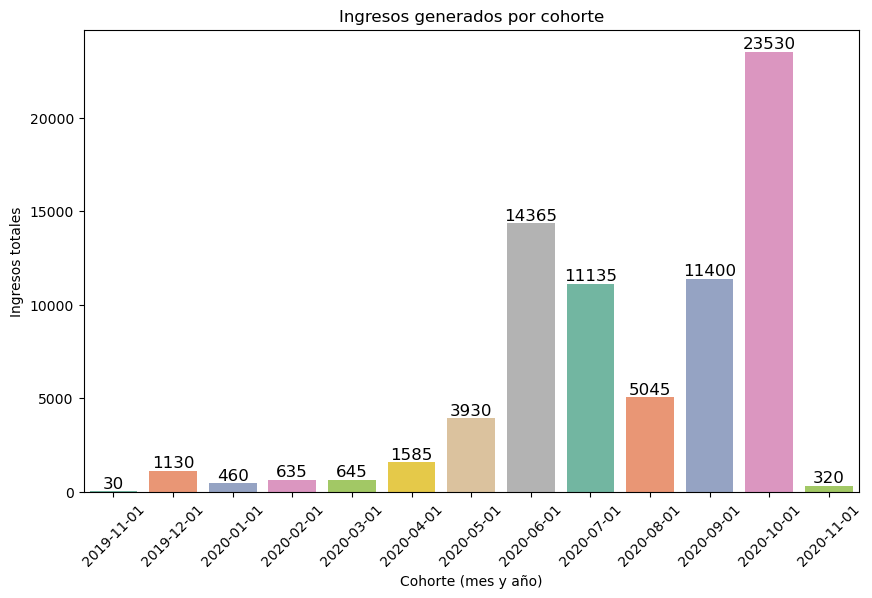

In [15]:
# 11. Analizar los ingresos generados por cohorte
print("\n\033[1m\033[95mPARTE 11: Analizar ingresos generados por cohorte\033[0m")

# 11.1 Hacemos un merge de ambos df 
df_combinados = df_fees.merge(df_cash[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

# 11.2 Verificamos la union de los data frame
display(df_combinados.head())

# 11.3 Contemplamos solo las comisiones que han sido aceptadas, ya que son las unicas que han generado ingresos registrados.
df_aprobados = df_combinados[(df_combinados['status'] == 'accepted')]

# 11.4 Agrupamos los ingresos por cohorte
ingresos_generados = df_aprobados[["total_amount", "cohort"]].groupby("cohort").sum()
print("Ingresos generados por cohorte:")
display(ingresos_generados)

# 11.5 Graficamos los ingresos generados por cohorte
plt.figure(figsize=(10, 6))
graf_ing = sns.barplot(x='cohort', y='total_amount', hue='cohort', data=ingresos_generados, palette='Set2', legend=False)
plt.title('Ingresos generados por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=12)  
plt.show()


PARTE 12: Distribución de estado por cohorte


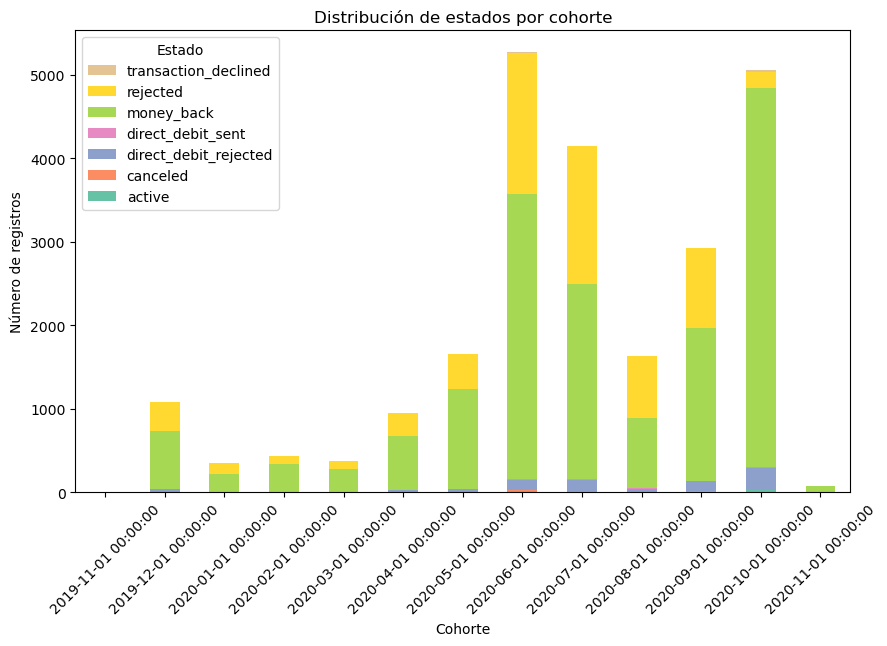

In [16]:
# 12. Distribución de estado por cohorte
print("\n\033[1m\033[95mPARTE 12: Distribución de estado por cohorte\033[0m")

# 12.1 Crear tabla pivote
cohort_status_counts = df_cash.pivot_table(index='cohort', columns='status', aggfunc='size', fill_value=0)

# 12.2 Usar paleta Set2 de Seaborn
palette = sns.color_palette("Set2")

# 12.3 Graficar
ax = cohort_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
plt.title('Distribución de estados por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Número de registros')
plt.xticks(rotation=45)

# 12.4 Ajustar la leyenda para que coincida con el gráfico
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Estado')

# 12.5 Mostrar el gráfico
plt.show()


PARTE 13: Tasas de incidentes por cohorte en %
Distribución de los estados de las solicitudes:


status,active,canceled,direct_debit_rejected,direct_debit_sent,money_back,rejected,transaction_declined
cohort,,,,,,,
2019-11-01 00:00:00,0,1,0,0,6,1,0
2019-12-01 00:00:00,0,1,41,2,690,345,1
2020-01-01 00:00:00,0,0,11,0,215,128,0
2020-02-01 00:00:00,1,0,8,0,330,101,1
2020-03-01 00:00:00,1,0,4,1,277,88,0
2020-04-01 00:00:00,0,0,34,1,642,275,0
2020-05-01 00:00:00,1,1,41,2,1192,423,0
2020-06-01 00:00:00,12,14,126,4,3415,1687,8
2020-07-01 00:00:00,14,3,136,3,2338,1648,5


Tasa de incidentes por cohorte (%):


,cohort,incident_rate
0,2019-11-01,25.000000
1,2019-12-01,36.111111
2,2020-01-01,39.265537
3,2020-02-01,24.943311
4,2020-03-01,25.067385
5,2020-04-01,32.563025
6,2020-05-01,28.132530
7,2020-06-01,34.922142
8,2020-07-01,43.284302
9,2020-08-01,48.223039


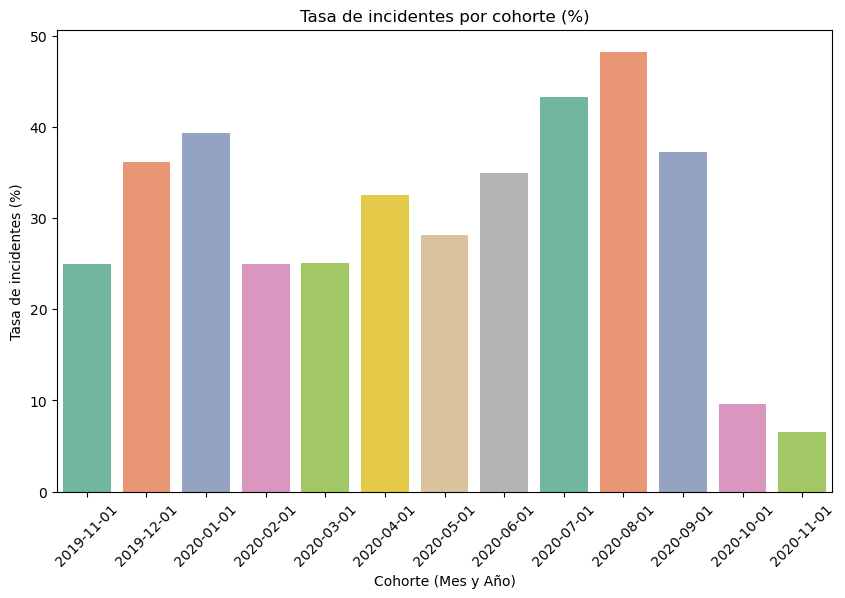

In [19]:
# 13. Tasas de incidentes por cohorte en %
print("\n\033[1m\033[95mPARTE 13: Tasas de incidentes por cohorte en %\033[0m")

# 13.1 Agregamos una fila con los totales para cada cohorte
cohort_status_counts.loc['Total'] = cohort_status_counts.sum()
# Mostramos el DataFrame con los totales
print("Distribución de los estados de las solicitudes:")
display(cohort_status_counts)

# Definir los estados de incidentes a filtrar
incident_status = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']

# 13.2 Filtrar solo los incidentes de pago
incident_df = df_cash[df_cash['status'].isin(incident_status)]

# 13.3 Contar el número de incidentes por cohorte
incident_counts = incident_df.groupby('cohort')['status'].count().reset_index(name='incidents_count')

# 13.4 Obtener el total de solicitudes por cohorte
total_requests = df_cash.groupby('cohort')['status'].count().reset_index(name='total_count')

# 13.5 Combinar ambas tablas para calcular la tasa de incidentes
cohort_incident_rate = incident_counts.merge(total_requests, on='cohort')
cohort_incident_rate['incident_rate'] = (cohort_incident_rate['incidents_count'] / cohort_incident_rate['total_count']) * 100

# 13.6 Mostrar la tasa de incidentes por cohorte
print("Tasa de incidentes por cohorte (%):")
display(cohort_incident_rate[['cohort', 'incident_rate']])

# 13.7 Visualización de la tasa de incidentes por cohorte
plt.figure(figsize=(10, 6))
sns.barplot(x='cohort', y='incident_rate', hue='cohort', data=cohort_incident_rate, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tasa de incidentes por cohorte (%)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de incidentes (%)')
plt.show()


PARTE 14: Porcentaje de incidentes por cohorte y tipo de estado


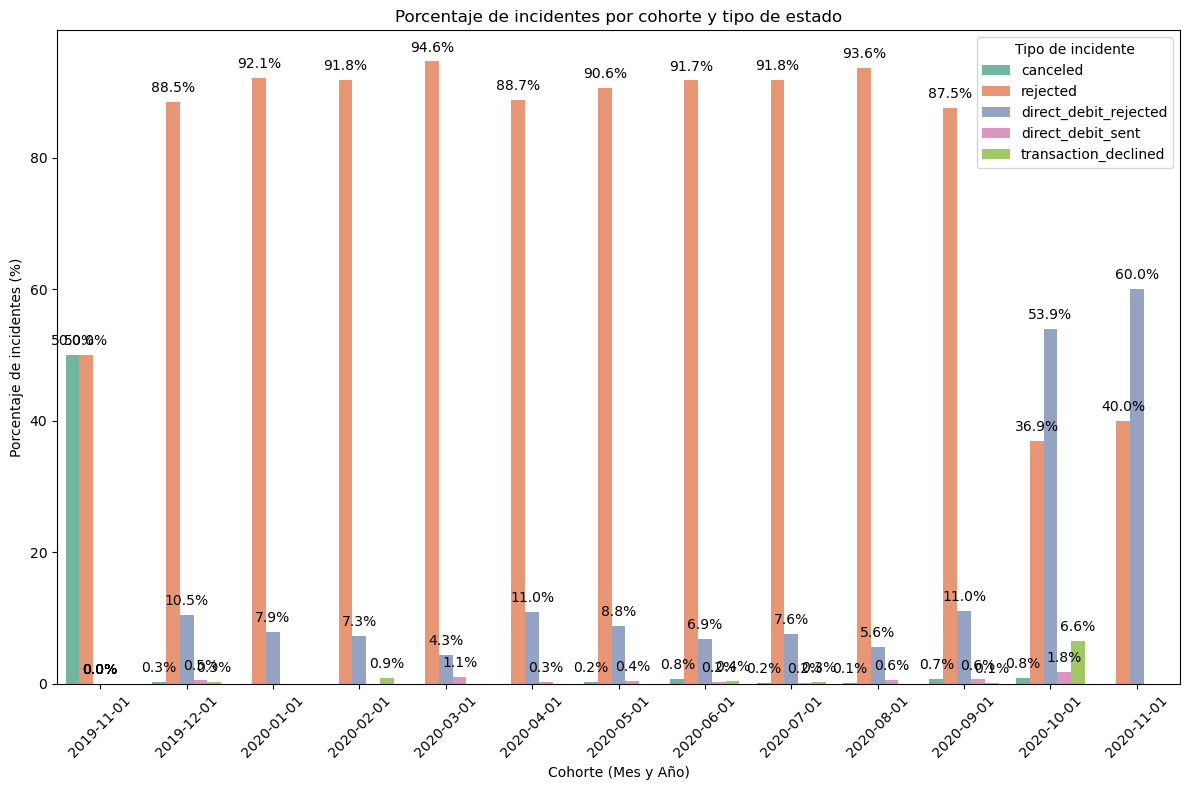

In [23]:
# 14. Porcentaje de incidentes por cohorte y tipo de estado
print("\n\033[1m\033[95mPARTE 14: Porcentaje de incidentes por cohorte y tipo de estado\033[0m")

# 14.1 Contar el número de incidentes por cohorte y tipo de estado
incident_counts2 = incident_df.groupby(['cohort', 'status']).size().reset_index(name='incidents_count')

# 14.2 Obtener el total de incidentes por cohorte para calcular el porcentaje
total_incidents_per_cohort = incident_counts2.groupby('cohort')['incidents_count'].sum().reset_index(name='total_incidents')

# 14.3 Combinar las tablas para calcular el porcentaje
incident_counts2 = incident_counts2.merge(total_incidents_per_cohort, on='cohort')
incident_counts2['percentage'] = (incident_counts2['incidents_count'] / incident_counts2['total_incidents']) * 100

# 14.4 Visualización de los incidentes como porcentajes por cohorte y tipo de estado
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=incident_counts2, x='cohort', y='percentage', hue='status', palette='Set2')
plt.xticks(rotation=45)
plt.title('Porcentaje de incidentes por cohorte y tipo de estado')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Porcentaje de incidentes (%)')
plt.legend(title='Tipo de incidente')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Desplazamiento vertical
                      textcoords='offset points')
plt.tight_layout()
plt.show()


PARTE 15: Porcentaje de incidentes por cohorte y tipo de estado apilado


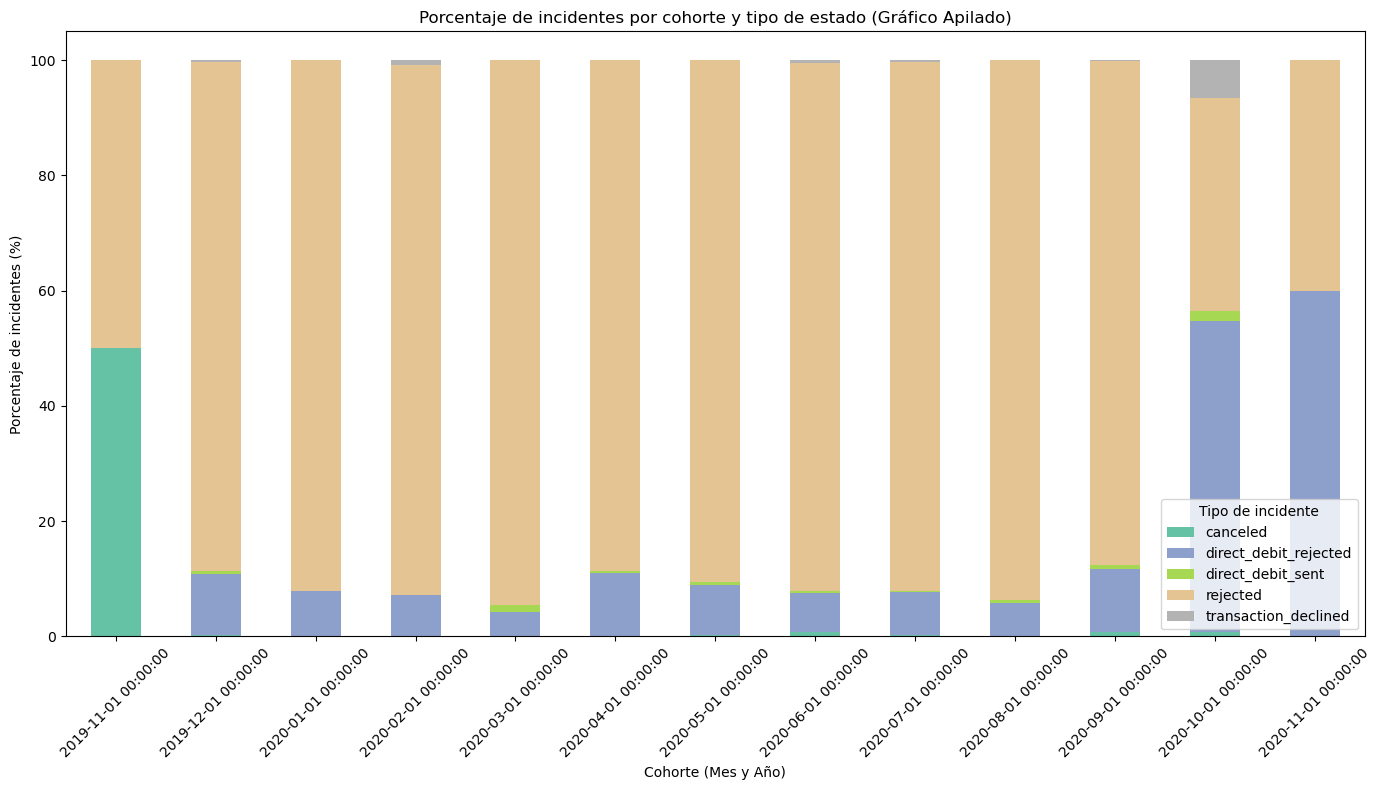

In [24]:
# 15. Porcentaje de incidentes por cohorte y tipo de estado apilado
print("\n\033[1m\033[95mPARTE 15: Porcentaje de incidentes por cohorte y tipo de estado apilado\033[0m")
# Visualización de los incidentes como porcentajes por cohorte y tipo de estado (gráfico apilado)
plt.figure(figsize=(14, 8))
# 15.1 Usamos pivot_table para reestructurar el DataFrame
incident_pivot = incident_counts2.pivot_table(index='cohort', columns='status', values='percentage', fill_value=0)
# 15.2 Graficar como un gráfico de barras apiladas
incident_pivot.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.xticks(rotation=45)
plt.title('Porcentaje de incidentes por cohorte y tipo de estado (Gráfico Apilado)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Porcentaje de incidentes (%)')
plt.legend(title='Tipo de incidente')
plt.tight_layout()
plt.show()


PARTE 16: Desglose de incidencias por tipo y cantidad


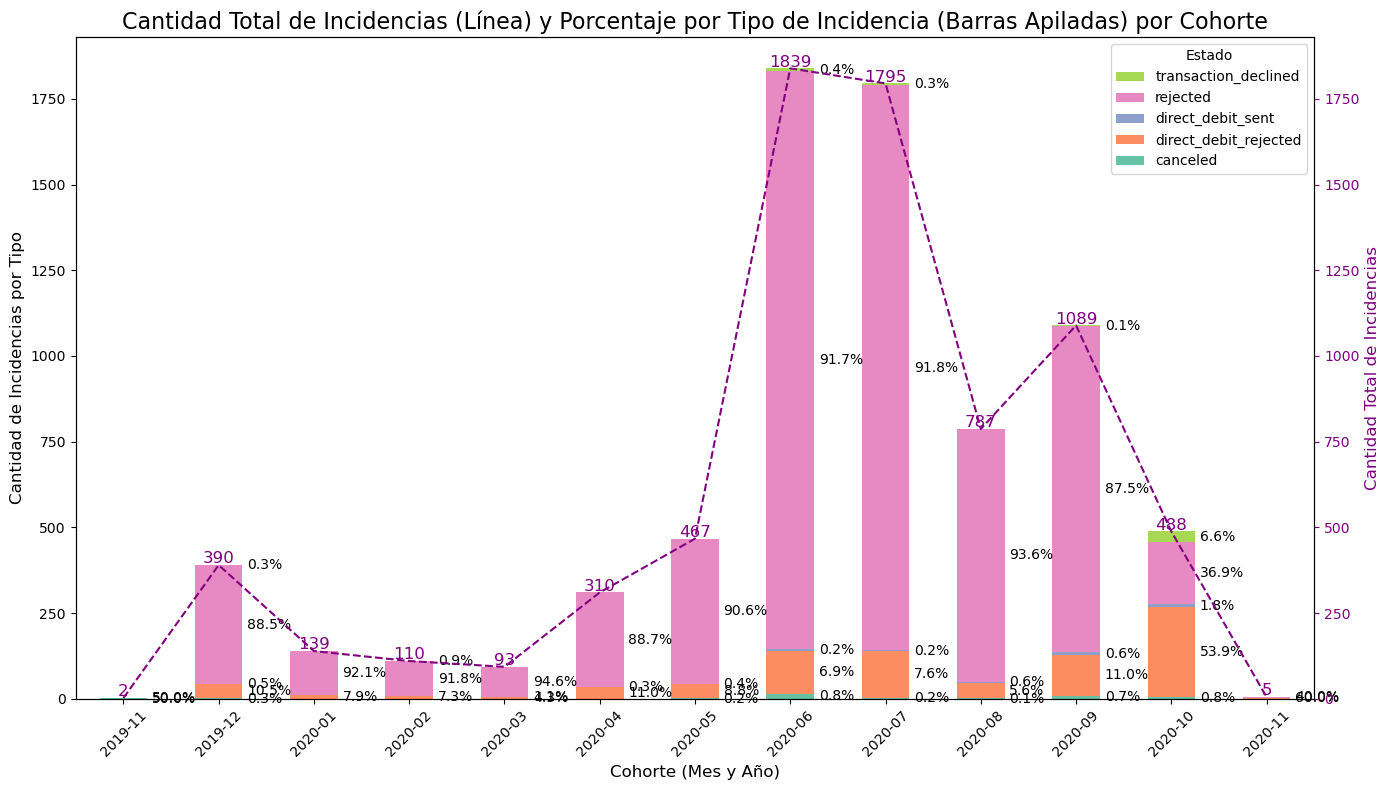

In [26]:
# 16 Desglose de incidencias por tipo y cantidad
print("\n\033[1m\033[95mPARTE 16: Desglose de incidencias por tipo y cantidad\033[0m")

# 16.1 Crear una tabla pivote para obtener la cantidad de incidencias por cohorte y tipo de incidencia
incident_pivot = incident_counts2.pivot_table(index='cohort', columns='status', values='incidents_count', fill_value=0)

# 16.2 Agrupar por cohorte y obtener la cantidad total de incidentes
cohort_incidents = incident_counts2.groupby('cohort').agg(
    total_incidents=('incidents_count', 'sum')
).reset_index()

# 16.3 Crear una figura y un eje
fig, ax1 = plt.subplots(figsize=(14, 8))

# 16.4 Graficar las barras apiladas para la cantidad de incidencias por tipo de incidente usando Set2
palette = sns.color_palette("Set2")
incident_pivot.plot(kind='bar', stacked=True, ax=ax1, color=palette)

# Convertir 'cohort' a formato datetime si no lo está ya
cohort_incidents['cohort'] = pd.to_datetime(cohort_incidents['cohort'], format='%Y-%m')

# 16.5 Establecer el título y etiquetas del eje y para el gráfico de barras
ax1.set_xlabel('Cohorte (Mes y Año)', fontsize=12)
ax1.set_ylabel('Cantidad de Incidencias por Tipo', fontsize=12)
plt.xticks(rotation=45)

# Formatear las etiquetas del eje X para mostrar solo año y mes
ax1.set_xticklabels(cohort_incidents['cohort'].dt.strftime('%Y-%m'))

# Añadir los porcentajes dentro de las barras
for i in range(len(incident_pivot)):
    total = cohort_incidents['total_incidents'].iloc[i]
    bottom = 0
    for j, val in enumerate(incident_pivot.iloc[i]):
        if val > 0:
            percentage = (val / total) * 100
            ax1.text(i + 0.3, bottom + val / 2, f'{percentage:.1f}%', ha='left', va='center', color='black', fontsize=10)
            bottom += val

# 16.6 Crear un segundo eje y para la cantidad total de incidencias
ax2 = ax1.twinx()

# 16.7 Graficar una línea para la cantidad total de incidencias por cohorte
sns.lineplot(x='cohort', y='total_incidents', data=cohort_incidents, ax=ax2, color='purple', marker='o')

# 16.8 Establecer etiquetas para el segundo eje y (cantidad total de incidencias)
ax2.set_ylabel('Cantidad Total de Incidencias', fontsize=12, color='purple')
ax2.tick_params('y', colors='purple')

# Añadir los valores totales encima de la línea
y_values = []
for i, total in enumerate(cohort_incidents['total_incidents']):
    ax2.text(i, total + 5, f'{int(total)}', ha='center', color='purple', fontsize=12)
    y_values.append(total)  # Almacenar los valores para la línea

# 16.9 Graficar la línea que conecta los totales
ax2.plot(cohort_incidents.index, y_values, color='purple', linestyle='--', linewidth=1.5)

# 16.9.1 Asegurar que ambos ejes compartan la misma escala
ax2.set_ylim(ax1.get_ylim())

# Invertir el orden de la leyenda
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Estado')

# 16.9.2 Visualizar gráfico
plt.title('Cantidad Total de Incidencias (Línea) y Porcentaje por Tipo de Incidencia (Barras Apiladas) por Cohorte', fontsize=16)
plt.tight_layout()
plt.show()


PARTE 17: Relación entre Frecuencia de Usanza y Ganancias de la Empresa (Agrupado)


C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_29372\1476748399.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='frecuencia', y='ganancias', data=df_frecuencia_ganancias_agrupadas, palette='Set2', s=100)


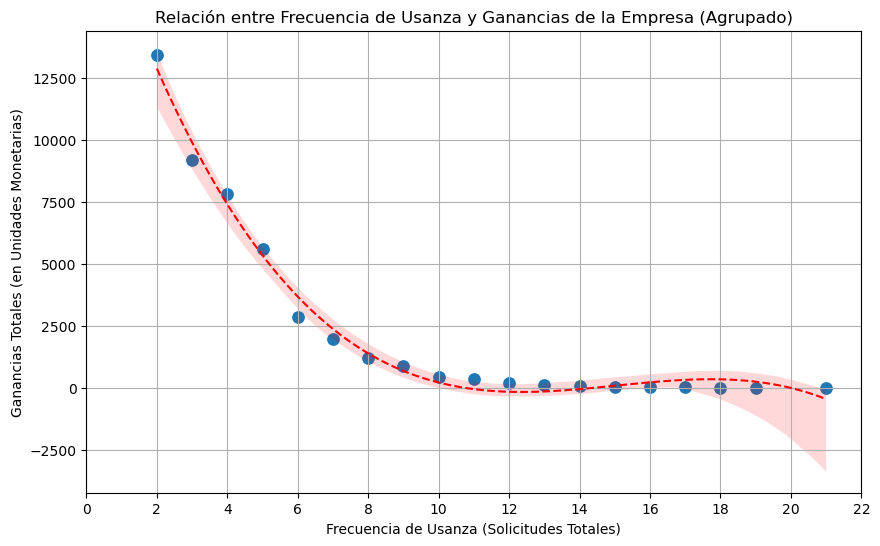

In [27]:
# 17 Relación entre la Frecuencia de Usanza y las Ganancias de la Empresa (Agrupado)
print("\n\033[1m\033[95mPARTE 17: Relación entre Frecuencia de Usanza y Ganancias de la Empresa (Agrupado)\033[0m")
# 17.1 Filtrar usuarios que han usado el servicio más de una vez
usuarios_multiples = df_cash['user_id'].value_counts()
usuarios_multiples = usuarios_multiples[usuarios_multiples > 1].index
# 17.2 Crear un DataFrame filtrado con usuarios que han usado el servicio más de una vez
df_cash_multiples = df_cash[df_cash['user_id'].isin(usuarios_multiples)]
# 17.3 Calcular la frecuencia de uso por usuario como el número total de solicitudes
frecuencia_por_usuario = df_cash_multiples.groupby('user_id')['id'].count().reset_index(name='frecuencia')
# 17.4 Unir las frecuencias al DataFrame de comisiones para obtener las ganancias por usuario
df_fees_filtered = df_fees[df_fees['status'] == 'accepted']
df_combinados = df_fees_filtered.merge(df_cash[['id', 'user_id']], left_on='cash_request_id', right_on='id', how='left')
df_combinados = df_combinados.merge(frecuencia_por_usuario, on='user_id', how='left')
# 17.5 Calcular las ganancias totales por usuario
ganancias_por_usuario = df_combinados.groupby('user_id')['total_amount'].sum().reset_index(name='ganancias')
# 17.6 Combinar las frecuencias y las ganancias en un solo DataFrame
df_frecuencia_ganancias = frecuencia_por_usuario.merge(ganancias_por_usuario, on='user_id')
# 17.7 Agrupar las ganancias por cada frecuencia única (sumando las ganancias de todos los usuarios con esa frecuencia)
df_frecuencia_ganancias_agrupadas = df_frecuencia_ganancias.groupby('frecuencia')['ganancias'].sum().reset_index()
# 17.8 Filtrar para eliminar ganancias negativas
df_frecuencia_ganancias_agrupadas = df_frecuencia_ganancias_agrupadas[df_frecuencia_ganancias_agrupadas['ganancias'] >= 0]
# 17.9 Visualizar la relación mediante un gráfico de dispersión (scatter plot) con línea de tendencia ajustada
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='frecuencia', y='ganancias', data=df_frecuencia_ganancias_agrupadas, palette='Set2', s=100)
# Ajustar una línea de tendencia polinómica de orden 3
sns.regplot(
    x='frecuencia',
    y='ganancias',
    data=df_frecuencia_ganancias_agrupadas,
    scatter=False,
    color='red',
    order=3,  # Ajuste cúbico
    line_kws={"linewidth": 1.5, "linestyle": "--"}
)
# Configurar el eje X para que vaya de 2 en 2
plt.xticks(range(0, df_frecuencia_ganancias_agrupadas['frecuencia'].max() + 2, 2))
# 17.10 Añadir etiquetas y título al gráfico
plt.title('Relación entre Frecuencia de Usanza y Ganancias de la Empresa (Agrupado)')
plt.xlabel('Frecuencia de Usanza (Solicitudes Totales)')
plt.ylabel('Ganancias Totales (en Unidades Monetarias)')
plt.grid(True)
# 17.11 Mostrar el gráfico
plt.show()


PARTE 20: Valor del Tiempo de Vida del Cliente (CLV)
Valor del Temps de Vida del Client (CLV): 104904.92


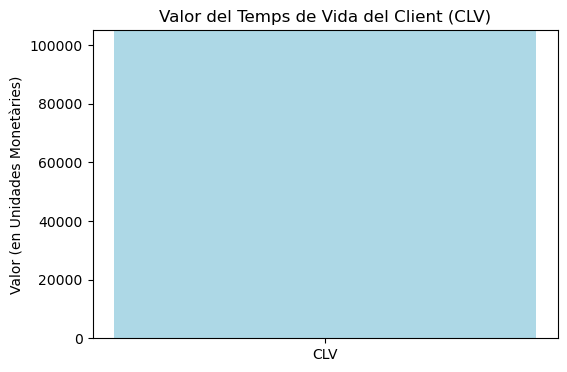

In [29]:
# PARTE 20: Valor del Tiempo de Vida del Cliente (CLV)
print("\n\033[1m\033[95mPARTE 20: Valor del Tiempo de Vida del Cliente (CLV)\033[0m")
# 20.1 Càlculs per a CLV
average_order_value = df_fees_filtered['total_amount'].mean()  # Valor mitjà de la compra
frequency_of_purchase = df_cash_multiples['user_id'].value_counts().mean()  # Frequència de compra
average_customer_lifetime = df_cash['user_id'].nunique() / df_cash['user_id'].value_counts().mean()  # Durada mitjana del client
# Calcular CLV
CLV = average_order_value * frequency_of_purchase * average_customer_lifetime
print(f"Valor del Temps de Vida del Client (CLV): {CLV:.2f}")
# Visualització del CLV
plt.figure(figsize=(6, 4))
plt.bar(['CLV'], [CLV], color='lightblue')
plt.title('Valor del Temps de Vida del Client (CLV)')
plt.ylabel('Valor (en Unidades Monetàries)')
plt.ylim(0, CLV + 100)  # Ajustem l'escala
plt.show()


PARTE 21: Tasa de Conversión de Solicitudes a Ganancias
Tasa de Conversión de Solicitudes a Ganancias: 61.91%


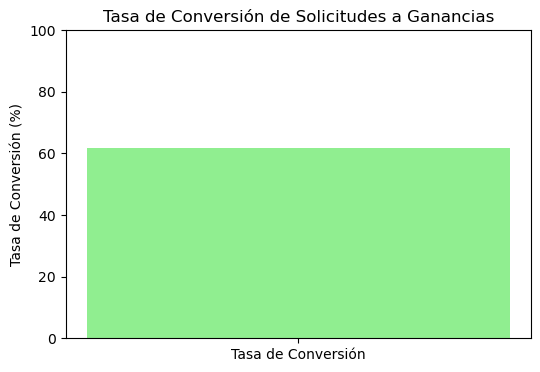

In [30]:
print("\n\033[1m\033[95mPARTE 21: Tasa de Conversión de Solicitudes a Ganancias\033[0m")
# 21.1 Calcular el total de solicitudes i acceptades
total_requests_count = df_cash.shape[0]
accepted_requests_count = df_fees_filtered.shape[0]
# 21.2 Calcular la tasa de conversió
conversion_rate = (accepted_requests_count / total_requests_count) * 100
print(f"Tasa de Conversión de Solicitudes a Ganancias: {conversion_rate:.2f}%")
# Visualització de la taxa de conversió
plt.figure(figsize=(6, 4))
plt.bar(['Tasa de Conversión'], [conversion_rate], color='lightgreen')
plt.title('Tasa de Conversión de Solicitudes a Ganancias')
plt.ylabel('Tasa de Conversión (%)')
plt.ylim(0, 100)  # Ajustem l'escala
plt.show()


PARTE 19: Tasa de Retención de Clientes
Tasa de retención por cohorte:


,cohort,retention_rate
0,2019-11-01,100.000000
1,2019-12-01,70.472441
2,2020-01-01,65.094340
3,2020-02-01,74.444444
4,2020-03-01,80.232558
5,2020-04-01,68.292683
6,2020-05-01,81.250000
7,2020-06-01,77.597403
8,2020-07-01,71.794872
9,2020-08-01,63.873626


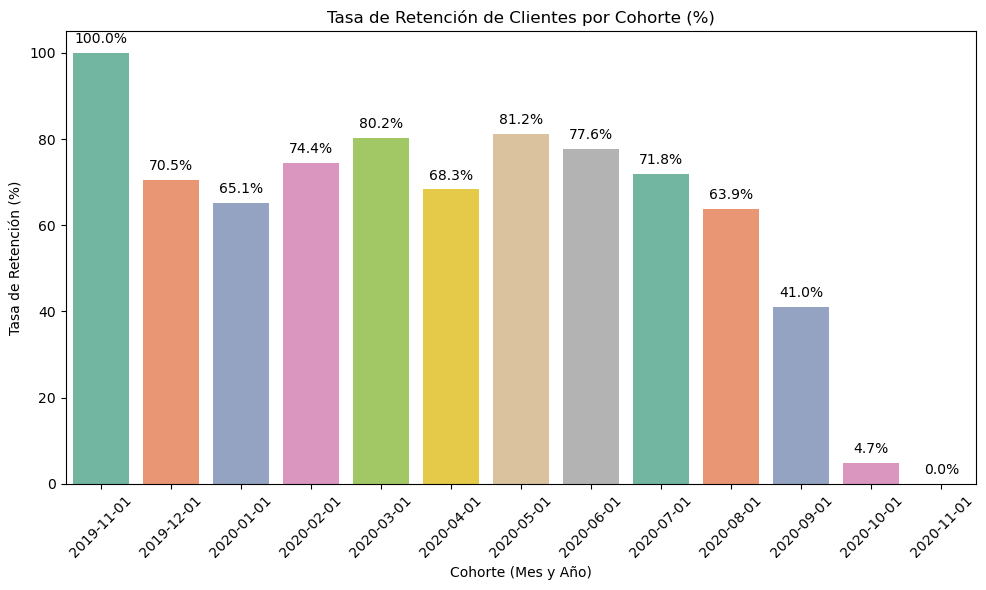

In [31]:
# Parte 19: Tasa de Retención de Clientes
print("\n\033[1m\033[95mPARTE 19: Tasa de Retención de Clientes\033[0m")
# 19.1 Definir clientes activos
active_clients = df_cash.groupby(['cohort', 'user_id']).size().reset_index(name='requests_count')
# 19.2 Calcular el número de clientes por cohorte
total_clients_per_cohort = active_clients.groupby('cohort')['user_id'].nunique().reset_index(name='total_clients')
# 19.3 Calcular el número de clientes que regresaron
returning_clients = active_clients[active_clients['requests_count'] > 1].groupby('cohort')['user_id'].nunique().reset_index(name='returning_clients')
# 19.4 Calcular la tasa de retención
retention_rate = total_clients_per_cohort.merge(returning_clients, on='cohort', how='left')
retention_rate['retention_rate'] = (retention_rate['returning_clients'] / retention_rate['total_clients']) * 100
retention_rate.fillna(0, inplace=True)
# 19.5 Mostrar la tasa de retención por cohorte
print("Tasa de retención por cohorte:")
display(retention_rate[['cohort', 'retention_rate']])
# 19.6 Visualización de la tasa de retención por cohorte
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cohort', y='retention_rate', hue="cohort", data=retention_rate, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tasa de Retención de Clientes por Cohorte (%)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de Retención (%)')
# Añadir los valores en la parte superior de las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=10, color='black',
                      xytext=(0, 5),  # Desplazamiento vertical
                      textcoords='offset points')
plt.tight_layout()
plt.show()

In [32]:
df_aprobados_sorted = df_aprobados.sort_values(by='created_at', ascending=True)
df_aprobados_sorted

,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort
1252,67,2292.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2292,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-07 00:00:00+00:00,2020-06-22 00:00:00+00:00,before,2292.0,2020-05-01
1211,46,1858.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1858,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-09 00:00:00+00:00,before,1858.0,2020-04-01
1212,48,1923.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1923,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-21 00:00:00+00:00,before,1923.0,2020-04-01
1214,56,2117.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,NaT,NaT,before,2117.0,2020-05-01
1250,65,2135.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2135,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-10 00:00:00+00:00,2020-07-09 00:00:00+00:00,before,2135.0,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,21166,21136.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-11-01 00:00:00+00:00,2020-11-01 00:00:00+00:00,2020-11-05 00:00:00+00:00,NaT,NaT,after,21136.0,2020-10-01
5545,21036,26931.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26931,2020-11-01 00:00:00+00:00,2020-11-01 00:00:00+00:00,2020-12-04 00:00:00+00:00,NaT,NaT,after,26931.0,2020-11-01
1116,20974,26893.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26893,2020-11-01 00:00:00+00:00,2020-11-01 00:00:00+00:00,2020-12-01 00:00:00+00:00,NaT,NaT,after,26893.0,2020-06-01
5633,21039,26932.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26932,2020-11-01 00:00:00+00:00,2020-11-01 00:00:00+00:00,2020-12-02 00:00:00+00:00,NaT,NaT,after,26932.0,2020-10-01


Ingresos generados por mes:


,created_at,total_amount
0,2020-05-31 00:00:00+00:00,60.0
1,2020-06-30 00:00:00+00:00,1700.0
2,2020-07-31 00:00:00+00:00,4020.0
3,2020-08-31 00:00:00+00:00,10900.0
4,2020-09-30 00:00:00+00:00,16540.0
5,2020-10-31 00:00:00+00:00,40210.0
6,2020-11-30 00:00:00+00:00,780.0


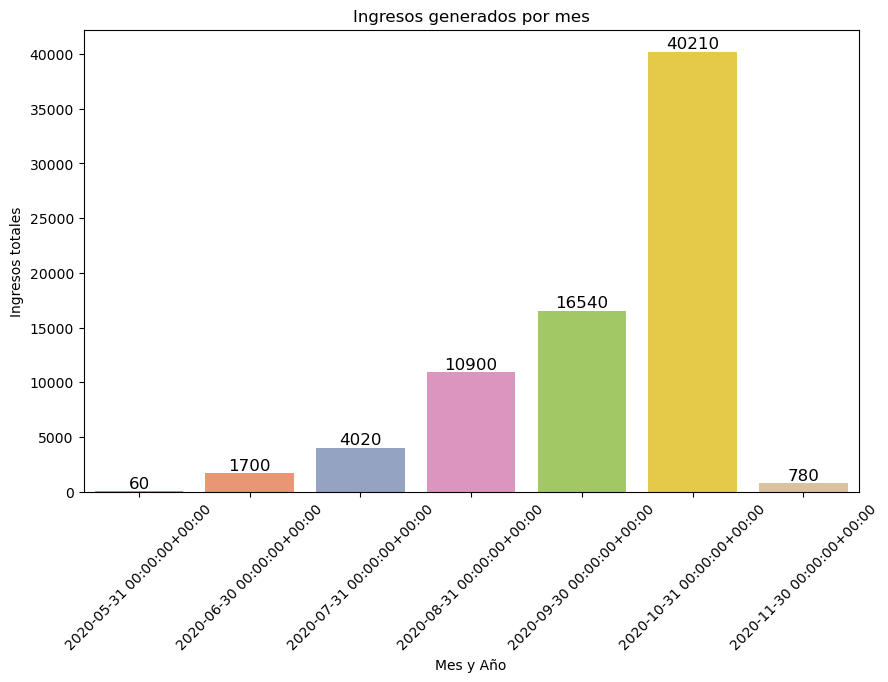

In [34]:
# Asegúrate de que 'created_at' esté en formato datetime
df_aprobados['created_at'] = pd.to_datetime(df_aprobados['created_at'])

# Agrupamos los ingresos por mes
ingresos_generados_pormes = df_aprobados.groupby(pd.Grouper(key='created_at', freq='ME'))['total_amount'].sum().reset_index()

print("Ingresos generados por mes:")
display(ingresos_generados_pormes)

# Graficamos los ingresos generados por mes
plt.figure(figsize=(10, 6))
graf_ing = sns.barplot(x='created_at', y='total_amount', data=ingresos_generados_pormes, hue="created_at", palette='Set2')
plt.title('Ingresos generados por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=12)  
plt.show()


In [35]:
filas_con_1106 = df_cash[df_cash['user_id'] == 1106.0]
display(filas_con_1106)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
1211,2062,100.0,money_back,2020-05-20 00:00:00+00:00,2020-06-11 00:00:00+00:00,1106.0,2020-05-20 00:00:00+00:00,NaN,NaT,2020-05-21,2020-06-11 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
7043,419,100.0,money_back,2020-01-09 00:00:00+00:00,2020-11-04 00:00:00+00:00,1106.0,2020-01-10 00:00:00+00:00,NaN,NaT,2020-01-11,2020-04-14 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
9255,1312,100.0,money_back,2020-04-21 00:00:00+00:00,2020-11-04 00:00:00+00:00,1106.0,2020-04-21 00:00:00+00:00,NaN,NaT,2020-04-22,2020-05-15 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
9721,3595,100.0,money_back,2020-06-17 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-06-17 00:00:00+00:00,NaN,NaT,2020-06-18,2020-07-07 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
13181,7054,100.0,money_back,2020-07-08 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-07-08 00:00:00+00:00,NaN,NaT,2020-07-10,NaT,regular,NaT,NaN,NaT,NaT,2020-01-01
14226,12164,100.0,money_back,2020-08-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-08-12 00:00:00+00:00,NaN,NaT,2020-08-13,2020-09-08 00:00:00+00:00,instant,2020-08-19 00:00:00+00:00,NaN,NaT,NaT,2020-01-01
16009,15376,100.0,money_back,2020-09-09 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-09-09 00:00:00+00:00,NaN,NaT,2020-09-10,NaT,instant,2020-09-16 00:00:00+00:00,NaN,NaT,NaT,2020-01-01
23467,21181,100.0,money_back,2020-10-14 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,NaT,NaN,NaT,2020-10-15,2020-11-26 00:00:00+00:00,instant,2020-10-14 00:00:00+00:00,completed,2020-11-20 00:00:00+00:00,2020-11-26 00:00:00+00:00,2020-01-01


Distribución de transfer_type:


,transfer_type,count
0,instant,13882
1,regular,10088


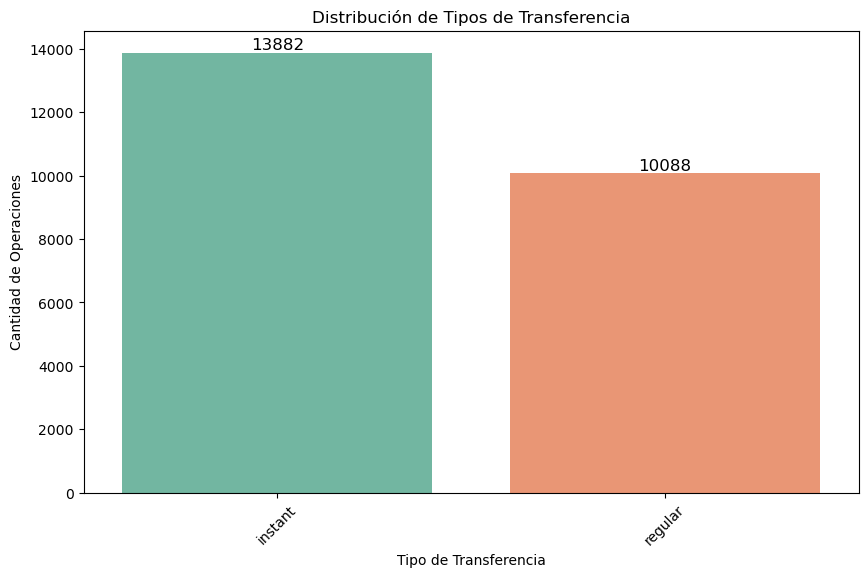

In [37]:
# Agrupar los datos por transfer_type y contar las ocurrencias
transfer_type_counts = df_cash['transfer_type'].value_counts().reset_index()
transfer_type_counts.columns = ['transfer_type', 'count']

print("Distribución de transfer_type:")
display(transfer_type_counts)

# Graficamos la distribución de transfer_type
plt.figure(figsize=(10, 6))
graf_transfer_type = sns.barplot(x='transfer_type', y='count', data=transfer_type_counts, hue="transfer_type", palette='Set2')
plt.title('Distribución de Tipos de Transferencia')
plt.xlabel('Tipo de Transferencia')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)
for p in graf_transfer_type.patches:
    graf_transfer_type.annotate(f'{int(p.get_height())}', 
                                (p.get_x() + p.get_width() / 2., p.get_height()),  
                                ha='center', va='bottom', fontsize=12)  
plt.show()


Cantidad de operaciones realizadas por mes y transfer_type:


,created_at,transfer_type,count
0,2019-11-30 00:00:00+00:00,regular,1
1,2019-12-31 00:00:00+00:00,regular,289
2,2020-01-31 00:00:00+00:00,regular,223
3,2020-02-29 00:00:00+00:00,regular,184
4,2020-03-31 00:00:00+00:00,regular,244
5,2020-04-30 00:00:00+00:00,regular,473
6,2020-05-31 00:00:00+00:00,regular,837
7,2020-06-30 00:00:00+00:00,regular,2615
8,2020-07-31 00:00:00+00:00,instant,344
9,2020-07-31 00:00:00+00:00,regular,3257


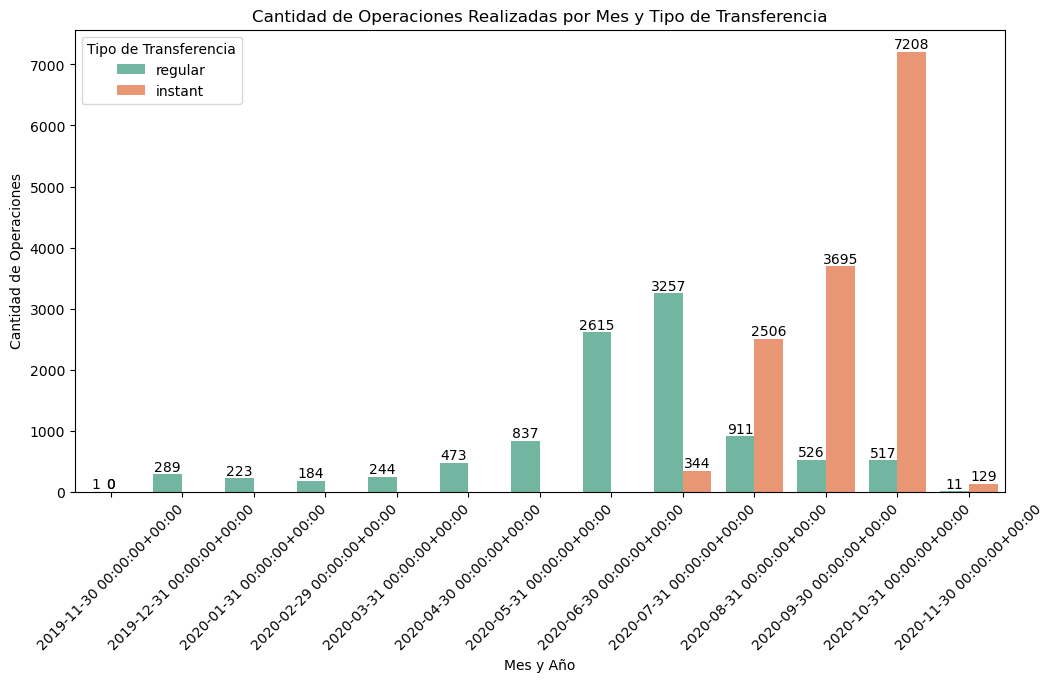

In [83]:
# Agrupamos por mes y transfer_type, contando el número de operaciones
operaciones_por_mes = df_cash.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')

print("Cantidad de operaciones realizadas por mes y transfer_type:")
display(operaciones_por_mes)

# Graficamos la cantidad de operaciones realizadas por mes subdivididas por transfer_type
plt.figure(figsize=(12, 6))
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)  
plt.legend(title='Tipo de Transferencia')
plt.show()

Ingresos generados por mes y tipo:


C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_29372\753642059.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ingresos_generados_pormes_y_type = df_aprobados.groupby([pd.Grouper(key='created_at', freq='M'), 'type'])['total_amount'].sum().reset_index()


,created_at,type,total_amount
0,2020-05,postpone,60.0
1,2020-06,incident,25.0
2,2020-06,postpone,1675.0
3,2020-07,incident,1065.0
4,2020-07,instant_payment,470.0
5,2020-07,postpone,2485.0
6,2020-08,incident,1855.0
7,2020-08,instant_payment,7070.0
8,2020-08,postpone,1975.0
9,2020-09,incident,1815.0


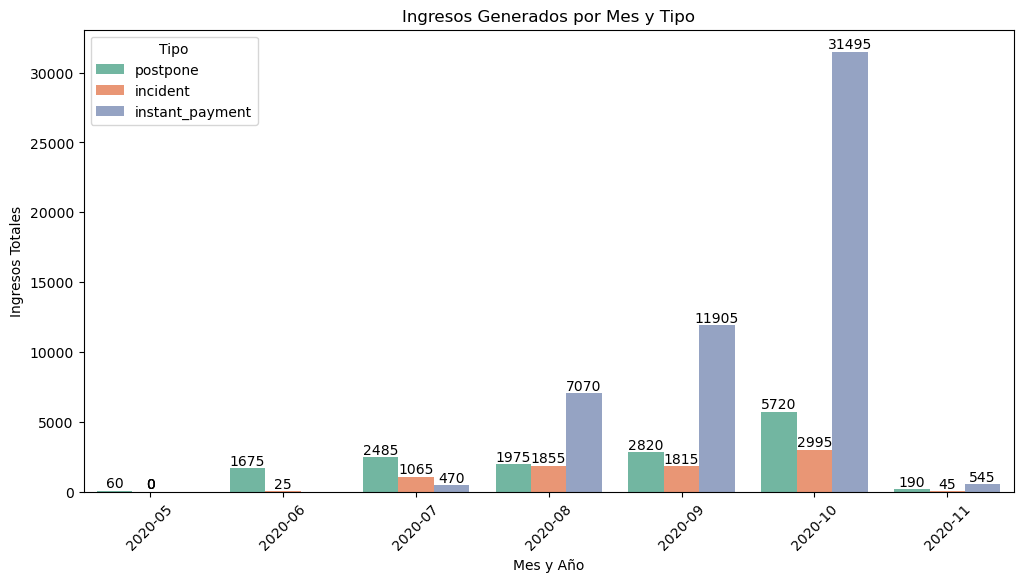

In [85]:
# Agrupamos los ingresos por mes y por type, sumando los total_amount
ingresos_generados_pormes_y_type = df_aprobados.groupby([pd.Grouper(key='created_at', freq='M'), 'type'])['total_amount'].sum().reset_index()

# Formatear 'created_at' para mostrar solo año y mes
ingresos_generados_pormes_y_type['created_at'] = ingresos_generados_pormes_y_type['created_at'].dt.strftime('%Y-%m')

print("Ingresos generados por mes y tipo:")
display(ingresos_generados_pormes_y_type)

# Graficamos los ingresos generados por mes subdivididos por type
plt.figure(figsize=(12, 6))
graf_ing = sns.barplot(x='created_at', y='total_amount', hue='type', data=ingresos_generados_pormes_y_type, palette='Set2')
plt.title('Ingresos Generados por Mes y Tipo')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=10)  
plt.legend(title='Tipo')
plt.show()


Cantidad de operaciones realizadas por mes y transfer_type sin incidencias:


C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_29372\2755793705.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  operaciones_por_mes = df_filtrado.groupby([pd.Grouper(key='created_at', freq='M'), 'transfer_type']).size().reset_index(name='count')


,created_at,transfer_type,count
0,2019-12-31 00:00:00+00:00,regular,154
1,2020-01-31 00:00:00+00:00,regular,102
2,2020-02-29 00:00:00+00:00,regular,102
3,2020-03-31 00:00:00+00:00,regular,165
4,2020-04-30 00:00:00+00:00,regular,309
5,2020-05-31 00:00:00+00:00,regular,592
6,2020-06-30 00:00:00+00:00,regular,1594
7,2020-07-31 00:00:00+00:00,instant,136
8,2020-07-31 00:00:00+00:00,regular,1785
9,2020-08-31 00:00:00+00:00,instant,1451


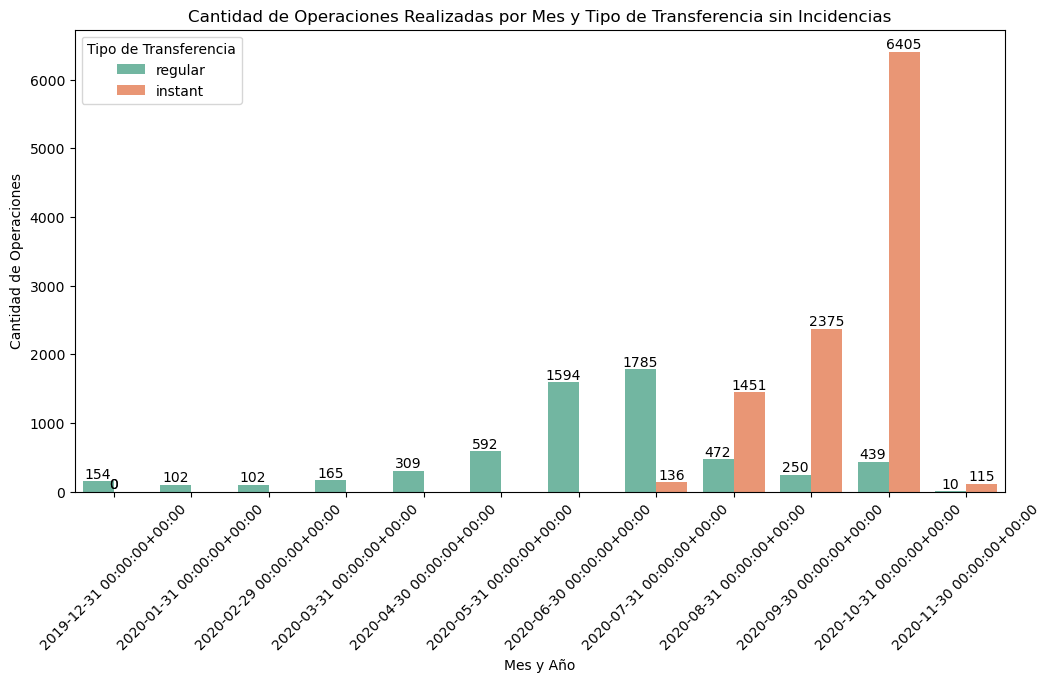

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que 'created_at' esté en formato datetime
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])

# Filtramos las operaciones que no tienen incidencias
estados_incidencias = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']
df_filtrado = df_cash[~df_cash['status'].isin(estados_incidencias)]

# Agrupamos por mes y transfer_type, contando el número de operaciones
operaciones_por_mes = df_filtrado.groupby([pd.Grouper(key='created_at', freq='M'), 'transfer_type']).size().reset_index(name='count')

print("Cantidad de operaciones realizadas por mes y transfer_type sin incidencias:")
display(operaciones_por_mes)

# Graficamos la cantidad de operaciones realizadas por mes subdivididas por transfer_type
plt.figure(figsize=(12, 6))
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia sin Incidencias')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)  
plt.legend(title='Tipo de Transferencia')
plt.show()


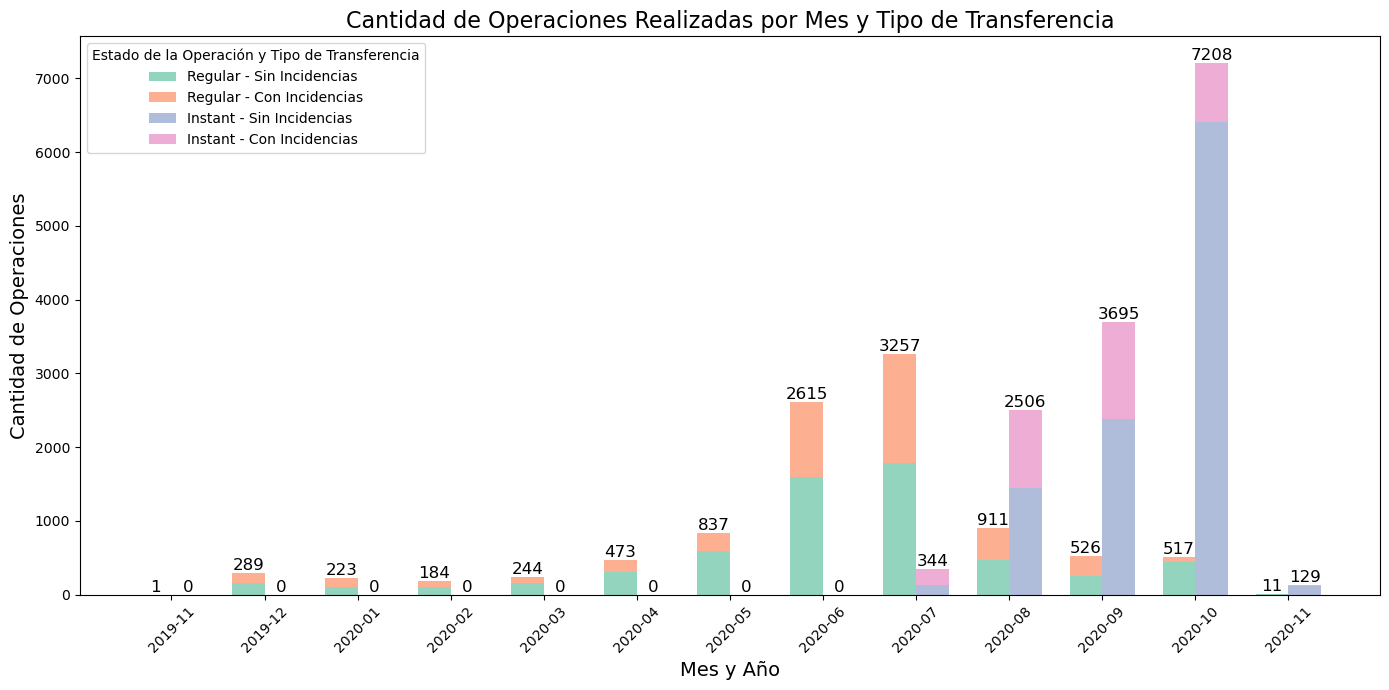

In [89]:
# Filtramos las operaciones que tienen incidencias
estados_incidencias = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']

# Agrupamos las operaciones sin incidencias
operaciones_sin_incidencias = df_cash[~df_cash['status'].isin(estados_incidencias)]
operaciones_sin_incidencias = operaciones_sin_incidencias.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')
operaciones_sin_incidencias['tipo'] = 'Sin Incidencias'

# Agrupamos las operaciones con incidencias
operaciones_con_incidencias = df_cash[df_cash['status'].isin(estados_incidencias)]
operaciones_con_incidencias = operaciones_con_incidencias.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')
operaciones_con_incidencias['tipo'] = 'Con Incidencias'

# Combinamos ambos DataFrames
operaciones_combinadas = pd.concat([operaciones_sin_incidencias, operaciones_con_incidencias], ignore_index=True)

# Pivotamos el DataFrame para tener una forma adecuada para el gráfico
operaciones_pivot = operaciones_combinadas.pivot_table(index='created_at', columns=['transfer_type', 'tipo'], values='count', fill_value=0)

# Graficamos la cantidad de operaciones apiladas por mes
plt.figure(figsize=(14, 7))

# Definir las posiciones de las barras
bar_width = 0.35
x = range(len(operaciones_pivot.index))

# Obtener la paleta Set2
colors = sns.color_palette('Set2')

# Graficar las operaciones "regular"
plt.bar(x, operaciones_pivot[('regular', 'Sin Incidencias')], width=bar_width, label='Regular - Sin Incidencias', color=colors[0], edgecolor=None, alpha=0.7)
plt.bar(x, operaciones_pivot[('regular', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('regular', 'Sin Incidencias')], label='Regular - Con Incidencias', color=colors[1], edgecolor=None, alpha=0.7)

# Graficar las operaciones "instant"
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Sin Incidencias')], width=bar_width, label='Instant - Sin Incidencias', color=colors[2], edgecolor=None, alpha=0.7)
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('instant', 'Sin Incidencias')], label='Instant - Con Incidencias', color=colors[3], edgecolor=None, alpha=0.7)

# Agregar los números de operaciones sobre cada barra (sin decimales)
for i in x:
    # Total apilado para "regular"
    total_regular = int(operaciones_pivot[('regular', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('regular', 'Con Incidencias')].iloc[i])
    plt.annotate(f'{total_regular}', 
                 (i, total_regular), 
                 ha='center', va='bottom', fontsize=12, color='black')
    
    # Total apilado para "instant"
    total_instant = int(operaciones_pivot[('instant', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('instant', 'Con Incidencias')].iloc[i])
    plt.annotate(f'{total_instant}', 
                 (i + bar_width, total_instant), 
                 ha='center', va='bottom', fontsize=12, color='black')

# Mejorar la legibilidad
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia', fontsize=16)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Cantidad de Operaciones', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], operaciones_pivot.index.strftime('%Y-%m'), rotation=45)
plt.legend(title='Estado de la Operación y Tipo de Transferencia', fontsize=10)
plt.tight_layout()  # Ajusta los márgenes para que no se corten las etiquetas

plt.show()



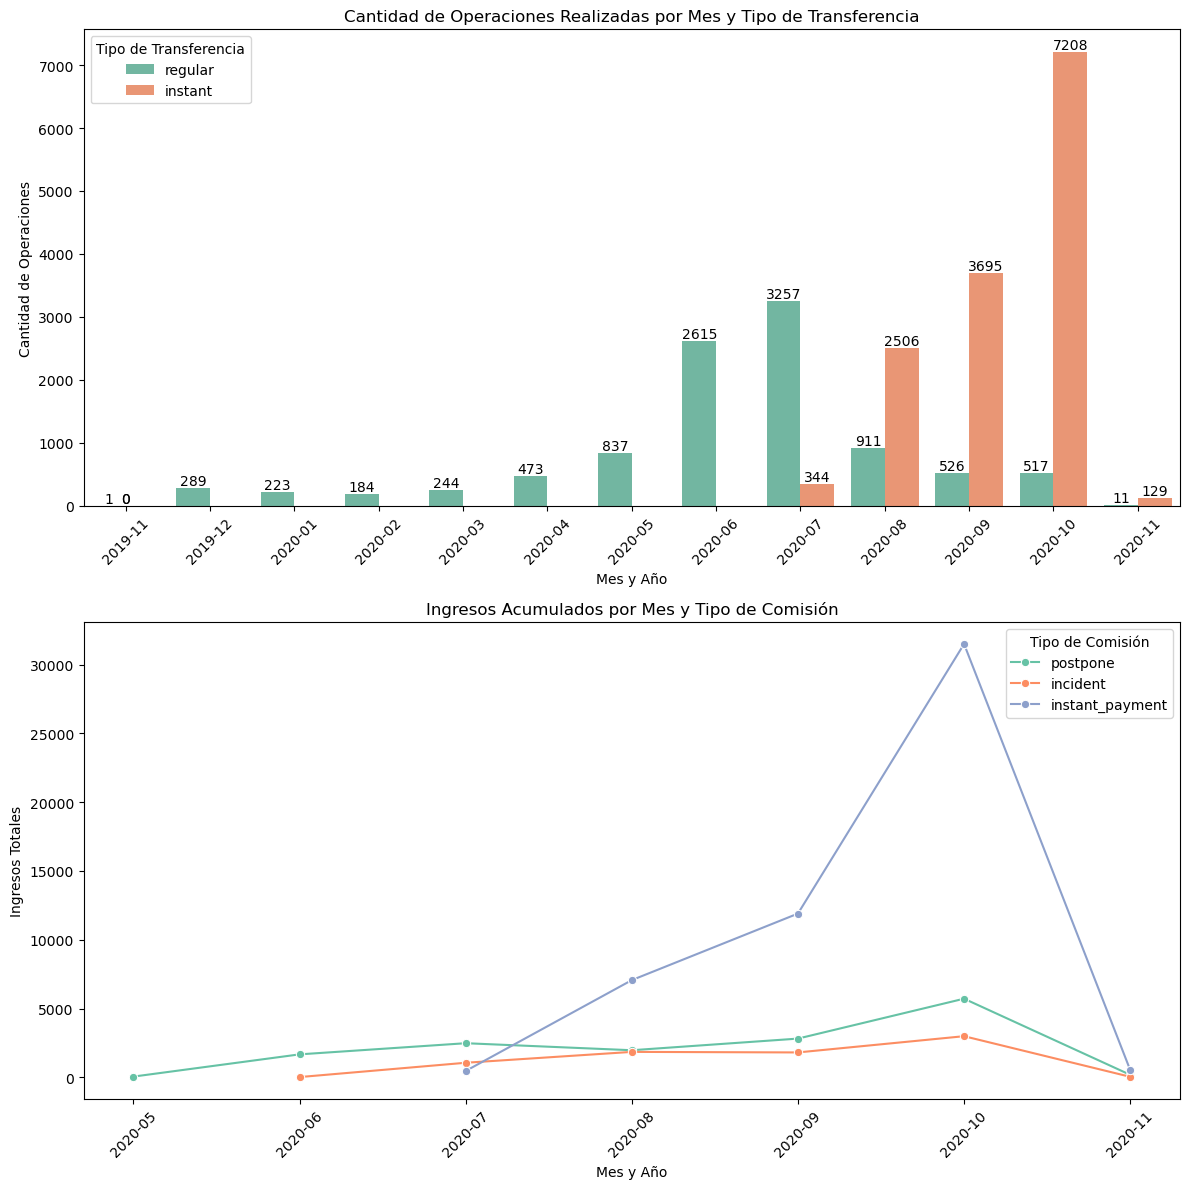

In [91]:
# Agrupar por mes y tipo de transferencia
operaciones_por_mes = df_cash.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')

# Formatear 'created_at' para mostrar solo año y mes
operaciones_por_mes['created_at'] = operaciones_por_mes['created_at'].dt.strftime('%Y-%m')


# Configuramos el tamaño del gráfico para ambos subgráficos
plt.figure(figsize=(12, 12))

# Subplot 1: Cantidad de operaciones realizadas por mes subdivididas por transfer_type
plt.subplot(2, 1, 1)
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)
plt.legend(title='Tipo de Transferencia')

# Subplot 2: Ingresos generados por mes acumulados subdivididos por type
plt.subplot(2, 1, 2)
graf_ing = sns.lineplot(x='created_at', y='total_amount', hue='type', data=ingresos_generados_pormes_y_type, marker="o", palette='Set2')
plt.title('Ingresos Acumulados por Mes y Tipo de Comisión')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Comisión')

# Mostramos ambos gráficos
plt.tight_layout()
plt.show()


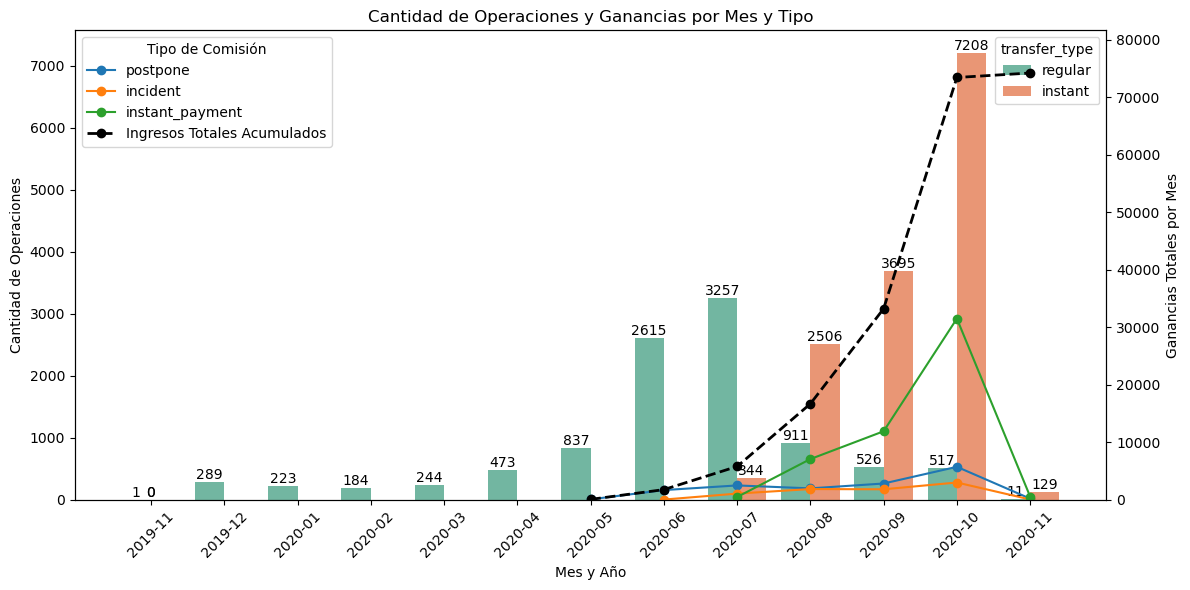

In [93]:
# Agrupar por mes y transfer_type
operaciones_por_mes = df_cash.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')

# Formatear 'created_at' para mostrar solo año y mes
operaciones_por_mes['created_at'] = operaciones_por_mes['created_at'].dt.strftime('%Y-%m')

# Agrupar ingresos generados por mes y type (cambia 'M' por 'ME')
ingresos_generados_pormes_y_type = df_aprobados.groupby([pd.Grouper(key='created_at', freq='ME'), 'type'])['total_amount'].sum().reset_index()

# Formatear 'created_at' para mostrar solo año y mes
ingresos_generados_pormes_y_type['created_at'] = ingresos_generados_pormes_y_type['created_at'].dt.strftime('%Y-%m')

# Cálculo de ingresos totales por mes
ingresos_totales_por_mes = ingresos_generados_pormes_y_type.groupby('created_at')['total_amount'].sum().reset_index()

# Cálculo de ingresos acumulativos
ingresos_totales_por_mes['total_acumulado'] = ingresos_totales_por_mes['total_amount'].cumsum()

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de operaciones
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones y Ganancias por Mes y Tipo')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)

# Añadir el segundo eje y para las ganancias no acumuladas
ax2 = graf_operaciones.twinx()
# Graficar las ganancias (sin acumulación)
for tipo in ingresos_generados_pormes_y_type['type'].unique():
    data_tipo = ingresos_generados_pormes_y_type[ingresos_generados_pormes_y_type['type'] == tipo]
    ax2.plot(data_tipo['created_at'], data_tipo['total_amount'], marker='o', label=tipo)

# Graficar la línea de ingresos totales acumulativos
ax2.plot(ingresos_totales_por_mes['created_at'], ingresos_totales_por_mes['total_acumulado'], marker='o', color='black', label='Ingresos Totales Acumulados', linewidth=2, linestyle='--')

# Asegurar que el eje y derecho comience en 0 y se ajuste
ax2.set_ylim(0, ingresos_totales_por_mes['total_acumulado'].max() * 1.1)  # Ajusta el límite superior si es necesario

ax2.set_ylabel('Ganancias Totales por Mes')

# Ajustes de leyenda para el segundo eje
ax2.legend(title='Tipo de Comisión', loc='upper left')

# Añadir etiquetas de conteo en las barras
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [95]:
# Realiza el merge entre df_cash y df_fees
merged_df = pd.merge(df_cash, df_fees[['cash_request_id', 'type', 'status', 'total_amount', 'paid_at']], 
                     left_on='id', right_on='cash_request_id', 
                     how='inner')

# Filtra las filas donde status es igual a 'accepted'
filtered_df = merged_df[merged_df['status_y'] == 'accepted']

# Muestra el resultado
filtered_df


,id,amount,status_x,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,send_at,recovery_status,reco_creation,reco_last_update,cohort,cash_request_id,type,status_y,total_amount,paid_at
0,23534,25.0,money_back,2020-10-23 00:00:00+00:00,2020-12-18 00:00:00+00:00,21465.0,NaT,NaN,NaT,NaT,...,2020-10-23 00:00:00+00:00,NaN,NaT,NaT,2020-09-01,23534.0,instant_payment,accepted,5.0,2020-11-06 00:00:00+00:00
1,2203,100.0,money_back,2020-05-27 00:00:00+00:00,2020-06-09 00:00:00+00:00,2109.0,2020-05-27 00:00:00+00:00,NaN,NaT,2020-05-29,...,NaT,NaN,NaT,NaT,2019-12-01,2203.0,postpone,accepted,5.0,NaT
13,20639,50.0,money_back,2020-10-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,30317.0,NaT,30317.0,NaT,2020-10-16,...,2020-10-15 00:00:00+00:00,NaN,NaT,NaT,2020-07-01,20639.0,postpone,accepted,5.0,2020-10-17 00:00:00+00:00
14,20639,50.0,money_back,2020-10-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,30317.0,NaT,30317.0,NaT,2020-10-16,...,2020-10-15 00:00:00+00:00,NaN,NaT,NaT,2020-07-01,20639.0,instant_payment,accepted,5.0,2020-10-31 00:00:00+00:00
16,2211,100.0,money_back,2020-05-27 00:00:00+00:00,2020-06-28 00:00:00+00:00,3045.0,2020-05-27 00:00:00+00:00,NaN,NaT,2020-05-29,...,NaT,NaN,NaT,NaT,2020-02-01,2211.0,postpone,accepted,5.0,2020-06-28 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,100.0,money_back,2020-10-20 00:00:00+00:00,2021-02-05 00:00:00+00:00,82122.0,NaT,NaN,NaT,2020-10-21,...,2020-10-20 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,22357.0,instant_payment,accepted,5.0,2021-02-05 00:00:00+00:00
21053,20256,100.0,money_back,2020-10-10 00:00:00+00:00,2021-02-05 00:00:00+00:00,64517.0,NaT,NaN,NaT,2020-10-12,...,2020-10-10 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,20256.0,postpone,accepted,5.0,2020-10-30 00:00:00+00:00
21054,20256,100.0,money_back,2020-10-10 00:00:00+00:00,2021-02-05 00:00:00+00:00,64517.0,NaT,NaN,NaT,2020-10-12,...,2020-10-10 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,20256.0,instant_payment,accepted,5.0,2021-02-05 00:00:00+00:00
21055,19886,100.0,direct_debit_sent,2020-10-08 00:00:00+00:00,2021-01-05 00:00:00+00:00,44867.0,NaT,NaN,NaT,2020-10-10,...,2020-10-08 00:00:00+00:00,NaN,NaT,NaT,2020-09-01,19886.0,postpone,accepted,5.0,2020-10-10 00:00:00+00:00


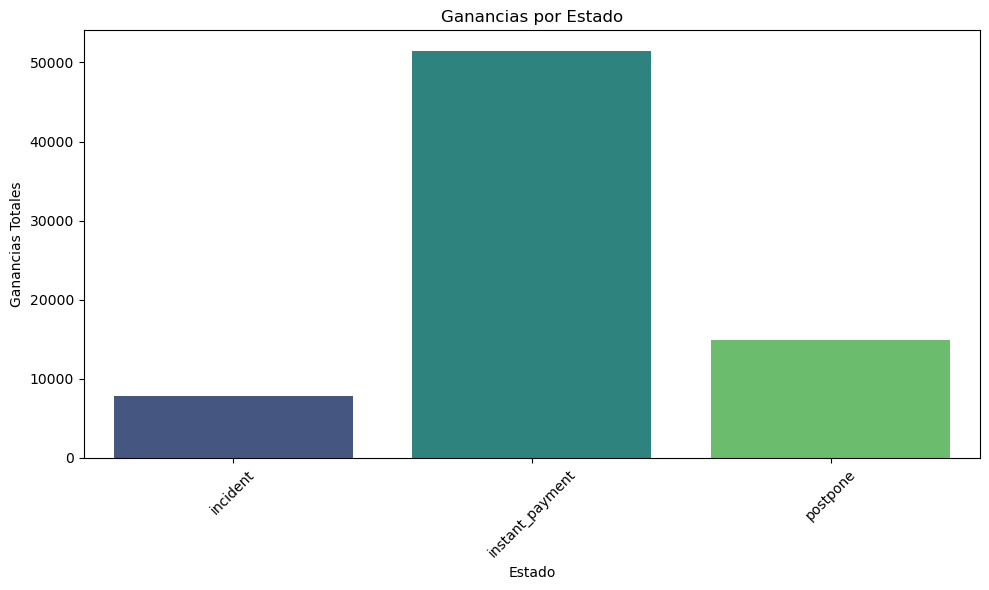

In [99]:
# Agrupa los datos por status y suma las ganancias
ganancias_por_status = filtered_df.groupby('type')['total_amount'].sum().reset_index()

# Configura el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=ganancias_por_status, x='type', y='total_amount', hue='type', palette='viridis')

# Agrega etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Ganancias Totales')
plt.title('Ganancias por Estado')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización

# Muestra el gráfico
plt.tight_layout()
plt.show()


In [49]:
filtered_df

,id,amount,status_x,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,send_at,recovery_status,reco_creation,reco_last_update,cohort,cash_request_id,type,status_y,total_amount,paid_at
0,23534,25.0,money_back,2020-10-23 00:00:00+00:00,2020-12-18 00:00:00+00:00,21465.0,NaT,NaN,NaT,NaT,...,2020-10-23 00:00:00+00:00,NaN,NaT,NaT,2020-09-01,23534.0,instant_payment,accepted,5.0,2020-11-06 00:00:00+00:00
1,2203,100.0,money_back,2020-05-27 00:00:00+00:00,2020-06-09 00:00:00+00:00,2109.0,2020-05-27 00:00:00+00:00,NaN,NaT,2020-05-29,...,NaT,NaN,NaT,NaT,2019-12-01,2203.0,postpone,accepted,5.0,NaT
13,20639,50.0,money_back,2020-10-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,30317.0,NaT,30317.0,NaT,2020-10-16,...,2020-10-15 00:00:00+00:00,NaN,NaT,NaT,2020-07-01,20639.0,postpone,accepted,5.0,2020-10-17 00:00:00+00:00
14,20639,50.0,money_back,2020-10-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,30317.0,NaT,30317.0,NaT,2020-10-16,...,2020-10-15 00:00:00+00:00,NaN,NaT,NaT,2020-07-01,20639.0,instant_payment,accepted,5.0,2020-10-31 00:00:00+00:00
16,2211,100.0,money_back,2020-05-27 00:00:00+00:00,2020-06-28 00:00:00+00:00,3045.0,2020-05-27 00:00:00+00:00,NaN,NaT,2020-05-29,...,NaT,NaN,NaT,NaT,2020-02-01,2211.0,postpone,accepted,5.0,2020-06-28 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,22357,100.0,money_back,2020-10-20 00:00:00+00:00,2021-02-05 00:00:00+00:00,82122.0,NaT,NaN,NaT,2020-10-21,...,2020-10-20 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,22357.0,instant_payment,accepted,5.0,2021-02-05 00:00:00+00:00
21053,20256,100.0,money_back,2020-10-10 00:00:00+00:00,2021-02-05 00:00:00+00:00,64517.0,NaT,NaN,NaT,2020-10-12,...,2020-10-10 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,20256.0,postpone,accepted,5.0,2020-10-30 00:00:00+00:00
21054,20256,100.0,money_back,2020-10-10 00:00:00+00:00,2021-02-05 00:00:00+00:00,64517.0,NaT,NaN,NaT,2020-10-12,...,2020-10-10 00:00:00+00:00,NaN,NaT,NaT,2020-10-01,20256.0,instant_payment,accepted,5.0,2021-02-05 00:00:00+00:00
21055,19886,100.0,direct_debit_sent,2020-10-08 00:00:00+00:00,2021-01-05 00:00:00+00:00,44867.0,NaT,NaN,NaT,2020-10-10,...,2020-10-08 00:00:00+00:00,NaN,NaT,NaT,2020-09-01,19886.0,postpone,accepted,5.0,2020-10-10 00:00:00+00:00


C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_29372\3489336782.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ax1.set_xticks(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str))
C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_29372\3489336782.py:37: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ax1.set_xticklabels(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str), rotation=45)


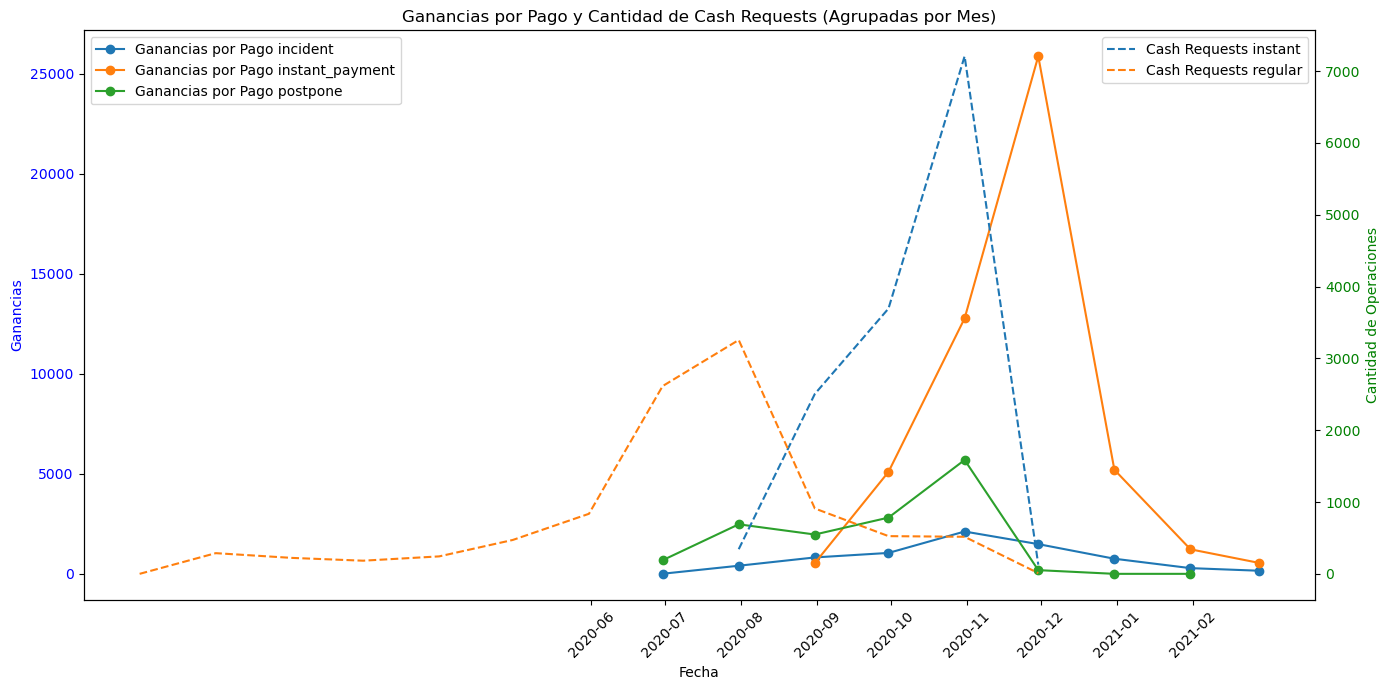

In [101]:
# Agrupa las ganancias por mes de pago y tipo de fee
ganancias_por_pago_fee = (filtered_df.groupby(['type', pd.Grouper(key='paid_at', freq='ME')])['total_amount']
                          .sum()
                          .reset_index())

# Agrupa la cantidad de cash requests por mes de creación y tipo de transferencia
ganancias_por_creacion = (df_cash.groupby(['transfer_type', pd.Grouper(key='created_at', freq='ME')])['id']
                          .count()
                          .reset_index(name='cash_requests'))

# Configura el gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de líneas para las ganancias por pago de cada tipo de fee (eje y primario)
for fee_type in ganancias_por_pago_fee['type'].unique():
    ganancias_por_tipo = ganancias_por_pago_fee[ganancias_por_pago_fee['type'] == fee_type]
    ax1.plot(ganancias_por_tipo['paid_at'], ganancias_por_tipo['total_amount'], marker='o', label=f'Ganancias por Pago {fee_type}')

ax1.set_ylabel('Ganancias', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Configura un segundo eje y para la cantidad de cash requests
ax2 = ax1.twinx()

# Gráfico de líneas para los cash requests
for transfer_type in ganancias_por_creacion['transfer_type'].unique():
    ganancias_por_transfer = ganancias_por_creacion[ganancias_por_creacion['transfer_type'] == transfer_type]
    ax2.plot(ganancias_por_transfer['created_at'], ganancias_por_transfer['cash_requests'], linestyle='--', label=f'Cash Requests {transfer_type}')

ax2.set_ylabel('Cantidad de Operaciones', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Configura el título y los ejes
plt.title('Ganancias por Pago y Cantidad de Cash Requests (Agrupadas por Mes)')
ax1.set_xlabel('Fecha')
ax1.set_xticks(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str))
ax1.set_xticklabels(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str), rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

# Muestra el gráfico
plt.show()


In [52]:
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
0,5,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,804.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12-01
1,70,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,231.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12-01
2,7,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,191.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12-01
3,10,99.0,rejected,2019-12-10 00:00:00+00:00,2019-12-18 00:00:00+00:00,761.0,2019-12-18 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT,2019-12-01
4,1594,100.0,rejected,2020-05-06 00:00:00+00:00,2020-05-07 00:00:00+00:00,7686.0,2020-05-07 00:00:00+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT,2020-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 00:00:00+00:00,2021-02-06 00:00:00+00:00,13681.0,NaT,NaN,NaT,2020-10-13,2021-02-06 00:00:00+00:00,instant,2020-10-12 00:00:00+00:00,NaN,NaT,NaT,2020-06-01
23966,25243,50.0,money_back,2020-10-27 00:00:00+00:00,2020-12-18 00:00:00+00:00,30367.0,NaT,30367.0,NaT,2020-10-28,2020-12-01 00:00:00+00:00,instant,2020-10-27 00:00:00+00:00,completed,2020-11-12 00:00:00+00:00,2020-12-01 00:00:00+00:00,2020-10-01
23967,22357,100.0,money_back,2020-10-20 00:00:00+00:00,2021-02-05 00:00:00+00:00,82122.0,NaT,NaN,NaT,2020-10-21,2021-02-05 00:00:00+00:00,instant,2020-10-20 00:00:00+00:00,NaN,NaT,NaT,2020-10-01
23968,20256,100.0,money_back,2020-10-10 00:00:00+00:00,2021-02-05 00:00:00+00:00,64517.0,NaT,NaN,NaT,2020-10-12,2021-02-05 00:00:00+00:00,instant,2020-10-10 00:00:00+00:00,NaN,NaT,NaT,2020-10-01


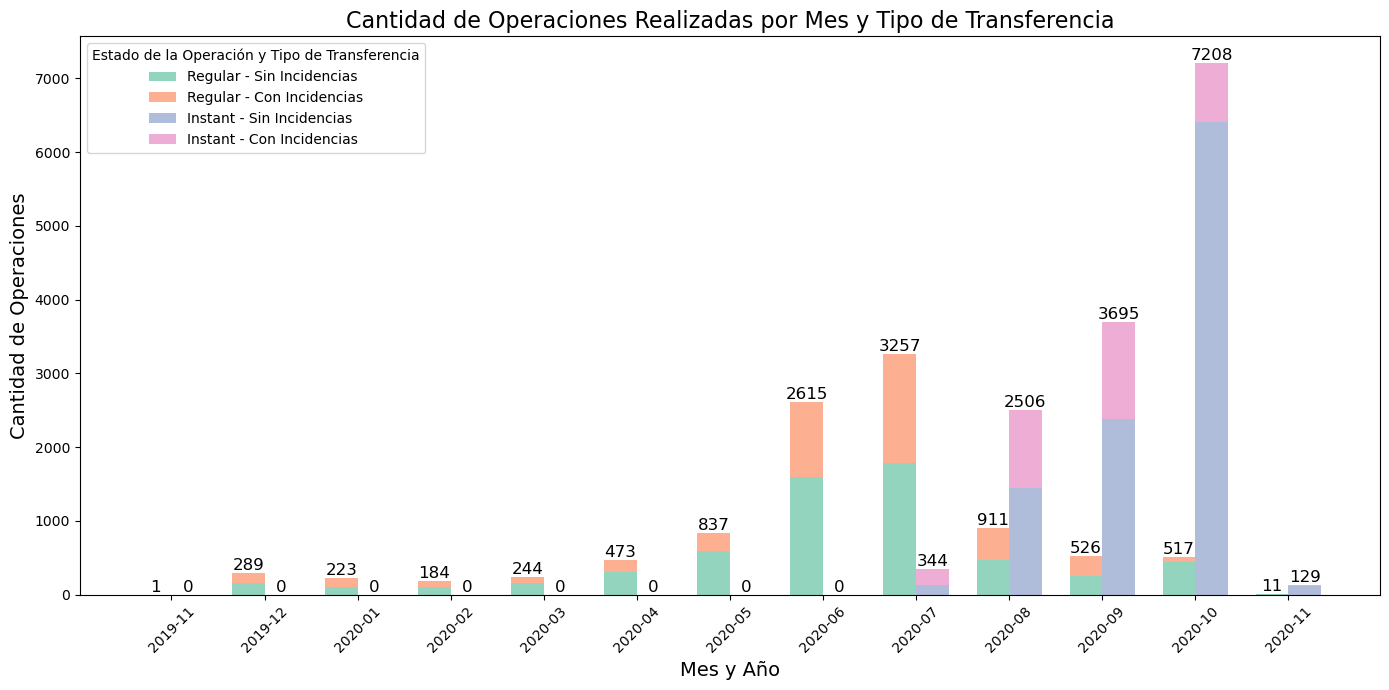

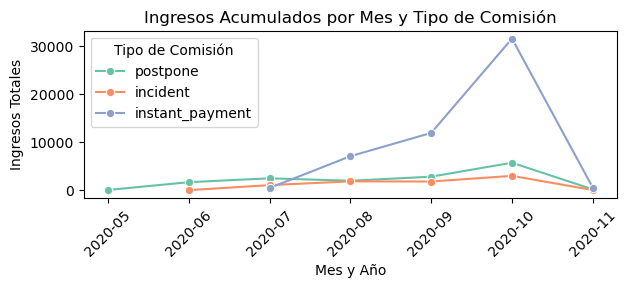

In [103]:
# Filtramos las operaciones que tienen incidencias
estados_incidencias = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']

# Agrupamos las operaciones sin incidencias
operaciones_sin_incidencias = df_cash[~df_cash['status'].isin(estados_incidencias)]
operaciones_sin_incidencias = operaciones_sin_incidencias.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')
operaciones_sin_incidencias['tipo'] = 'Sin Incidencias'

# Agrupamos las operaciones con incidencias
operaciones_con_incidencias = df_cash[df_cash['status'].isin(estados_incidencias)]
operaciones_con_incidencias = operaciones_con_incidencias.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')
operaciones_con_incidencias['tipo'] = 'Con Incidencias'

# Combinamos ambos DataFrames
operaciones_combinadas = pd.concat([operaciones_sin_incidencias, operaciones_con_incidencias], ignore_index=True)

# Pivotamos el DataFrame para tener una forma adecuada para el gráfico
operaciones_pivot = operaciones_combinadas.pivot_table(index='created_at', columns=['transfer_type', 'tipo'], values='count', fill_value=0)

# Graficamos la cantidad de operaciones apiladas por mes
plt.figure(figsize=(14, 7))

# Definir las posiciones de las barras
bar_width = 0.35
x = range(len(operaciones_pivot.index))

# Colores para las diferentes categorías
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # Paleta de colores manualmente definida

# Graficar las operaciones "regular"
plt.bar(x, operaciones_pivot[('regular', 'Sin Incidencias')], width=bar_width, label='Regular - Sin Incidencias', color=colors[0], alpha=0.7)
plt.bar(x, operaciones_pivot[('regular', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('regular', 'Sin Incidencias')], label='Regular - Con Incidencias', color=colors[1], alpha=0.7)

# Graficar las operaciones "instant"
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Sin Incidencias')], width=bar_width, label='Instant - Sin Incidencias', color=colors[2], alpha=0.7)
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('instant', 'Sin Incidencias')], label='Instant - Con Incidencias', color=colors[3], alpha=0.7)

# Agregar los números de operaciones sobre cada barra (sin decimales)
for i in x:
    # Total apilado para "regular"
    total_regular = int(operaciones_pivot[('regular', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('regular', 'Con Incidencias')].iloc[i])
    plt.annotate(f'{total_regular}', 
                 (i, total_regular), 
                 ha='center', va='bottom', fontsize=12, color='black')
    
    # Total apilado para "instant"
    total_instant = int(operaciones_pivot[('instant', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('instant', 'Con Incidencias')].iloc[i])
    plt.annotate(f'{total_instant}', 
                 (i + bar_width, total_instant), 
                 ha='center', va='bottom', fontsize=12, color='black')

# Mejorar la legibilidad
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia', fontsize=16)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Cantidad de Operaciones', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], operaciones_pivot.index.strftime('%Y-%m'), rotation=45)
plt.legend(title='Estado de la Operación y Tipo de Transferencia', fontsize=10)

# Eliminar la cuadrícula de fondo
plt.grid(False)

plt.tight_layout()  # Ajusta los márgenes para que no se corten las etiquetas

plt.show()

# Subplot 2: Ingresos generados por mes acumulados subdivididos por type
plt.subplot(2, 1, 2)
graf_ing = sns.lineplot(x='created_at', y='total_amount', hue='type', data=ingresos_generados_pormes_y_type, marker="o", palette='Set2')
plt.title('Ingresos Acumulados por Mes y Tipo de Comisión')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Comisión')

# Mostramos ambos gráficos
plt.tight_layout()
plt.show()

